In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle

s_path = os.path.dirname(os.path.realpath(__file__))
sys.path.append(s_path)

pd.set_option('display.max_columns',100)
pd.set_option('precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import tm_teoriaMvto_label as tm_label
import tm_teoriaMvto_train as tm_train


In C:\Users\Desktop\Anaconda3\envs\ngym36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Desktop\Anaconda3\envs\ngym36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Desktop\Anaconda3\envs\ngym36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Desktop\Anaconda3\envs\ngym36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Desktop\Anaconda3\envs\n

In [2]:
train_obj = tm_train.ModelTraining(s_regime = 'mi_up', run_model = 'svm')  # loading data and split train and test


training_init: data load and split complete!


In [3]:
pd.isna(train_obj.x_train).sum().sort_values(ascending=False).head(50)

sspread_mean_us_5      0
imp_c                  0
imp_v_0.8              0
imp_v_0.7              0
imp_v_0.6              0
imp_v                  0
imp_c_0.9              0
imp_c_0.8              0
imp_c_0.7              0
imp_c_0.6              0
int_dif_v              0
int_c_0.6              0
int_v_0.9              0
int_v_0.8              0
int_v_0.7              0
int_v_0.6              0
int_v                  0
int_dif_c              0
int_c_0.9              0
int_c_0.8              0
imp_v_0.9              0
vewma                  0
rng_ewma               0
vewma_g_p              0
loc_aggbig_c_m_aux     0
aggbig_net_m_aux       0
agg_net_m_aux          0
n_aggimb_aux           0
aggimb_big_aux         0
aggimb_aux             0
aggpior_v_aux          0
aggpior_c_aux          0
big_v_aux              0
big_c_aux              0
vol_big_ratio_aux      0
n_big_aux              0
vol_big_aux            0
n_trd_aux              0
vol_trd_aux            0
vewmag_dif             0


In [4]:
train_obj.optimized_training()


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 8.7210
Function value obtained: 0.9755
Current minimum: 0.9755
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.8383
Function value obtained: 0.8352
Current minimum: 0.8352
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 6.1232
Function value obtained: 0.7624
Current minimum: 0.7624
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 6.5575
Function value obtained: 0.9755
Current minimum: 0.7624
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 7.2008
Function value obtained: 1.0000
Current minimum: 0.7624
Iteration No: 6 started. Evaluating

In [5]:
label_obj = tm_label.SampleLabeling(prefix_files= 'ft_20')  
# reads .csv features files returned by strategy and start DataFrame to label
# default s_path is 'explore\\historical_files\\FeaturesFiles\\'
# to change directory especify s_path='new_diretory' to tm_label.labeling()

# 1) classification-binary 
label_obj.reset_params(label_type= 'c_binary', b_dist_to_high= False, th_label_y1=0.5, b_percent_freq=True, b_custom_dir=True)
label_obj.apply_label()
# apply_label() will export 4 pickle files to label_obj.s_path


mi: 30866 22.8%, md: 15375 11.3%, mw: 89250 65.9%
labeling() complete!


In [6]:
train_obj = tm_train.ModelTraining(s_regime = 'mi_up', run_model = 'svm')  # loading data and split train and test


training_init: data load and split complete!


In [7]:
train_obj.x_train

2.194   
           67015  09:30:47.568000               0.611               0.329   
...                                               ...                 ...   
2021-01-21 935156 14:51:18.956000               0.761               0.940   
           936015 14:51:42.285000               0.292               0.427   
           943637 14:55:13.748000              -0.517              -0.485   
           948326 14:56:20.909000               0.205               0.160   
           961349 15:03:55.529000              -0.184              -0.164   

                                   movesc_ask_2.5_0.9  movesc_bid_3.5  \
date_trd   update time                                                  
2020-06-01 49460  09:21:41.989000               0.679           0.061   
           52825  09:23:20.039000               1.104           0.300   
           53165  09:23:31.093000               0.257           0.434   
           63011  09:29:48.428000               0.602           1.665   
           67015  09:30:47.568000               0.705           0.367   
...                                               ...             ...   
2021-01-21 935156 14:51:18.956000               1.104           0.173   
           936015 14:51:42.285000               0.830           0.173   
           943637 14:55:13.748000              -0.383           0.501   
           948326 14:56:20.909000               0.147           0.300   
           961349 15:03:55.529000              -0.087           0.602   

                                   movesc_ask_3.5  movesc_bid_3.5_0.5  \
date_trd   update time                                                  
2020-06-01 49460  09:21:41.989000           0.556               0.052   
           52825  09:23:20.039000           1.148               0.043   
           53165  09:23:31.093000           1.148               0.256   
           63011  09:29:48.428000          -1.317               2.212   
           67015  09:30:47.568000           0.593               0.149   
...                                           ...                 ...   
2021-01-21 935156 14:51:18.956000           0.037               0.059   
           936015 14:51:42.285000           0.038               0.074   
           943637 14:55:13.748000           0.334               0.363   
           948326 14:56:20.909000           0.001               0.043   
           961349 15:03:55.529000           0.501               0.523   

                                   movesc_ask_3.5_0.5  movesc_bid_3.5_0.7  \
date_trd   update time                                                      
2020-06-01 49460  09:21:41.989000               0.400               0.268   
           52825  09:23:20.039000               0.643               0.308   
           53165  09:23:31.093000               0.415               0.443   
           63011  09:29:48.428000              -0.091               1.675   
           67015  09:30:47.568000               0.415               0.376   
...                                               ...                 ...   
2021-01-21 935156 14:51:18.956000               0.090               0.406   
           936015 14:51:42.285000               0.124               0.306   
           943637 14:55:13.748000               0.431               0.182   
           948326 14:56:20.909000               0.157               0.306   
           961349 15:03:55.529000               0.567               0.491   

                                   movesc_ask_3.5_0.7  movesc_bid_3.5_0.9  \
date_trd   update time                                                      
2020-06-01 49460  09:21:41.989000               0.544              -0.040   
           52825  09:23:20.039000               0.943               0.181   
           53165  09:23:31.093000               0.719               0.381   
           63011  09:29:48.428000              -0.445               2.212   
           67015  09:30:47.568000               0.569               0.281   
...       

In [8]:
train_obj = None

In [9]:
train_obj = tm_train.ModelTraining(s_regime = 'mi_up', run_model = 'svm')  # loading data and split train and test


training_init: data load and split complete!


In [10]:
train_obj.run_individual()


Models will be evaluated using:
['vol_trd', 'n_trd', 'vol_big', 'n_big', 'vol_big_ratio', 'big_c', 'big_v', 'aggpior_c', 'aggpior_v', 'aggimb', 'aggimb_big', 'n_aggimb', 'agg_net_m', 'aggbig_net_m', 'loc_aggbig_c_m', 'loc_aggbig_v_m', 'loc_agg_net_m', 'loc_aggbig_net_m', 'loc_agg_imb_m', 'loc_aggbig_imb_m', 'pagg_c_best', 'pagg_c_best_0.5', 'pagg_c_best_0.7', 'pagg_c_best_0.9', 'pagg_v_best', 'pagg_v_best_0.5', 'pagg_v_best_0.7', 'pagg_v_best_0.9', 'abagg', 'n_p', 'agg_net_d', 'aggbig_net_d', 's_run', 'chgfreq', 'last_d_s', 'abs_c', 'abs_v', 'PA_up', 'PA_down', 'loc_agg_net_d', 'loc_aggbig_net_d', 'int_c', 'int_c_0.6', 'int_c_0.7', 'int_c_0.8', 'int_c_0.9', 'int_dif_c', 'int_v', 'int_v_0.6', 'int_v_0.7', 'int_v_0.8', 'int_v_0.9', 'int_dif_v', 'imp_c', 'imp_c_0.6', 'imp_c_0.7', 'imp_c_0.8', 'imp_c_0.9', 'imp_v', 'imp_v_0.6', 'imp_v_0.7', 'imp_v_0.8', 'imp_v_0.9', 'vewma', 'rng_ewma', 'vewma_g_p', 'vewma_c_v', 'vewmag_dif', 'vol_trd_aux', 'n_trd_aux', 'vol_big_aux', 'n_big_aux', 'vol_bi

KeyboardInterrupt: 

In [11]:
train_obj.y_train.sum()/train_obj.y_train.count()

0.3391992250565063

In [12]:
(train_obj.y_train.count()-train_obj.y_train.sum())/train_obj.y_train.sum()

1.9481199428843408

In [14]:
import xgboost as xgb


In [15]:
def report_results(X_train, X_test, y_train, y_test, fitted_model=None, th=0.0, verbose=True, y_prob_train=None, y_prob_test=None, ready_probs = False):
  if not ready_probs:
    y_prob_train = fitted_model.predict_proba(X_train)[:, 1]
    y_prob_test = fitted_model.predict_proba(X_test)[:, 1]
  if th == 0.0:
    yhat_train, th = optimize_threshold(y_train, y_prob_train)  # passing probs and getting integers y 
  else:
    yhat_train = yhat_threshold(y_prob_train,th)
  train_auc = roc_auc_score(y_train, y_prob_train)
  train_f1 = f1_score(y_train, yhat_train, average='binary')
  train_f1_balanced = f1_score(y_train, yhat_train, average='weighted')
  cm_train = confusion_matrix(y_train, yhat_train)  # passing integers to CM
  yhat_test = yhat_threshold(y_prob_test,th)
  test_auc = roc_auc_score(y_test, y_prob_test)
  test_f1 = f1_score(y_test, yhat_test, average='binary')
  test_f1_balanced = f1_score(y_test, yhat_test, average='weighted')
  cm_test = confusion_matrix(y_test, yhat_test) 
  ## SHOW SCORES
  if verbose:
    print('train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(train_auc, test_auc, train_auc - test_auc))
    print('train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(train_f1, test_f1, train_f1 - test_f1))
    print('train_f1BL:{:.2f}, test_f1BL:{:.2f} (overfit: {:.2f})'.format(train_f1_balanced, test_f1_balanced, train_f1_balanced - test_f1_balanced))
    print('--------')
    # print('test_auc: {:.3f}, overfit: {:.3f}'.format(test_auc, train_auc - test_auc))
    # print('test_f1: {:.3f}, overfit: {:.3f}'.format(test_f1, train_f1 - test_f1))
    # print('test_f1_balanced: {:.3f}, overfit: {:.3f}'.format(test_f1_balanced, train_f1_balanced - test_f1_balanced))
    # print('--------')
    print('cm_train: ')
    print(cm_train)
    print('cm_test: ')
    print(cm_test)
    print('threshold: {:.1f}'.format(th))
  return train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, cm_train, cm_test, yhat_train, yhat_test, th



In [16]:
def save_models(model, s_name, s_path):

  file_to_store = open(s_path + s_name + ".pkl", "wb")
  pickle.dump(model, file_to_store)
  file_to_store.close()


def load_models(s_name, s_path):

  file_to_store = open(s_path + s_name + ".pkl", "rb")
  model_object = pickle.load(file_to_store)
  file_to_store.close()

  return model_object


def base_norm(base, clip=0.001, norm_cols=[]):

  mup_perc = base.describe(percentiles=[clip,(1.0-clip)]).iloc[[4,6]]
  
  if 'y' in list(base.columns):
    mup_clip = base.drop(['y'], axis=1).copy()
  else:
    mup_clip = base.copy()
  
  cols = mup_clip.columns if norm_cols == [] else norm_cols
  for col in cols:
      mup_clip[col] = base[col].clip(mup_perc.iloc[0][col], mup_perc.iloc[1][col])
      mup_clip[col] = (mup_clip[col]-mup_clip[col].mean())/mup_clip[col].std()

  mup_clip.fillna(0.0, inplace=True)

  return mup_clip


def ft_importance_plot(model, base, plot_result=True):

  imp = pd.DataFrame({'cols':base.columns.tolist(), 'importance': model.feature_importances_})
  imp.sort_values(by=['importance'], inplace=True, ascending=False)
  
  if plot_result:
    plot_importance(imp)

  return imp  


def plot_importance(rf_imp):

  rf_imp_main = rf_imp.head(50)
  plt.figure(dpi=100, figsize=(16, 16))
  plt.bar(np.arange(rf_imp_main.shape[0]), rf_imp_main['importance'])
  plt.xticks(np.arange(rf_imp_main.shape[0]), rf_imp_main['cols'].tolist(), rotation = 90)


def optimize_threshold(y_true, y_prob):

  accuracies = []
  thresholds = np.arange(0.2,1,0.1)
  
  for th in thresholds:
    y_pred = np.greater(y_prob, th).astype(int)
    acc = f1_score(y_true, y_pred)
    accuracies.append(acc)
  
  accuracies = np.array(accuracies)
  # max_accuracy = accuracies.max() 
  th_max_acc = thresholds[accuracies.argmax()]
  yhat_th = np.greater(y_prob, th_max_acc).astype(int)

  return yhat_th, th_max_acc


def yhat_threshold(y_prob, th):
  
  yhat_th = np.greater(y_prob, th).astype(int)
  
  return yhat_th


def report_results(X_train, X_test, y_train, y_test, fitted_model=None, th=0.0, verbose=True, y_prob_train=None, y_prob_test=None, ready_probs = False):

  if not ready_probs:
    y_prob_train = fitted_model.predict_proba(X_train)[:, 1]
    y_prob_test = fitted_model.predict_proba(X_test)[:, 1]

  if th == 0.0:
    yhat_train, th = optimize_threshold(y_train, y_prob_train)  # passing probs and getting integers y 
  else:
    yhat_train = yhat_threshold(y_prob_train,th)
    
  train_auc = roc_auc_score(y_train, y_prob_train)
  train_f1 = f1_score(y_train, yhat_train, average='binary')
  train_f1_balanced = f1_score(y_train, yhat_train, average='weighted')
  cm_train = confusion_matrix(y_train, yhat_train)  # passing integers to CM

  yhat_test = yhat_threshold(y_prob_test,th)
  test_auc = roc_auc_score(y_test, y_prob_test)
  test_f1 = f1_score(y_test, yhat_test, average='binary')
  test_f1_balanced = f1_score(y_test, yhat_test, average='weighted')
  cm_test = confusion_matrix(y_test, yhat_test) 

  ## SHOW SCORES
  if verbose:
    print('train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(train_auc, test_auc, train_auc - test_auc))
    print('train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(train_f1, test_f1, train_f1 - test_f1))
    print('train_f1BL:{:.2f}, test_f1BL:{:.2f} (overfit: {:.2f})'.format(train_f1_balanced, test_f1_balanced, train_f1_balanced - test_f1_balanced))
    print('--------')
    # print('test_auc: {:.3f}, overfit: {:.3f}'.format(test_auc, train_auc - test_auc))
    # print('test_f1: {:.3f}, overfit: {:.3f}'.format(test_f1, train_f1 - test_f1))
    # print('test_f1_balanced: {:.3f}, overfit: {:.3f}'.format(test_f1_balanced, train_f1_balanced - test_f1_balanced))
    # print('--------')
    print('cm_train: ')
    print(cm_train)
    print('cm_test: ')
    print(cm_test)
    print('threshold: {:.1f}'.format(th))
    
  return train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, cm_train, cm_test, yhat_train, yhat_test, th


def rscv_clf(clf, d_params, X_train, y_train, X_test, y_test):
    
    clf_cv = RandomizedSearchCV(estimator=clf, param_distributions=d_params, n_iter=10, 
                              cv=3, verbose=1, return_train_score=True, scoring='roc_auc')  # or roc_auc_ovo_weighted
    clf_cv.fit(X_train, y_train)

    print("\nBest: %f using %s" % (clf_cv.best_score_, clf_cv.best_params_))
    search_means = clf_cv.cv_results_['mean_test_score']
    search_stds = clf_cv.cv_results_['std_test_score']
    search_params = clf_cv.cv_results_['params']
    for mean, stdev, param in zip(search_means, search_stds, search_params):
      print("%f (%f) with: %r" % (mean, stdev, param))

    score_train = clf_cv.cv_results_['mean_train_score'].mean()
    print('[cv] Score on train data: %.3f' % score_train)
    score_test = clf_cv.cv_results_['mean_test_score'].mean()
    print('[cv] Score on test data: %.3f' % score_test)
    
    overfit_devs = abs(clf_cv.cv_results_['mean_train_score'] - clf_cv.cv_results_['mean_test_score'])
    estimate = clf_cv.cv_results_['mean_test_score'] - clf_cv.cv_results_['std_test_score'] / 3 - overfit_devs / 2
    print('just_fit: %.3f' % estimate)

    yhat_train = clf_cv.predict_proba(X_train)[:, 1]
    yhat_test = clf_cv.predict_proba(X_test)[:, 1]

    yhat, th = optimize_threshold(y_train, yhat_train)  # passing probs and getting integers y 
    cm_train = confusion_matrix(y_train, yhat)  # passing integers to CM
    score_is = roc_auc_score(y_train, yhat_train)  # passing probs to roc_auc
    print('Score in sample: %.3f' % score_is)

    yhat, th2 = optimize_threshold(y_test, yhat_test)
    cm_test = confusion_matrix(y_test, yhat)
    score_oos = roc_auc_score(y_test, yhat_test)
    print('Score out of sample: %.3f' % score_oos)

    return [score_train, score_test, score_is, score_oos, clf_cv.best_params_, cm_train, th, cm_test, th2]


def create_dl(learn_rate, layers_drops, regularizer):
    
    keras_dl = Sequential()

    ## LAYER (FIRST)
    keras_dl.add(Dense(layers_drops[0][0], input_dim = ddim, activation = 'relu', 
                kernel_regularizer = regularizers.l2(regularizer)))
    keras_dl.add(BatchNormalization())
    keras_dl.add(Dropout(rate = layers_drops[1][0]))

    # HIDDEN LAYERS
    for i in range(len(layers_drops[0])-1):
        keras_dl.add(Dense(layers_drops[0][i+1], activation = 'relu', 
                    kernel_regularizer = regularizers.l2(regularizer)))
        keras_dl.add(BatchNormalization())
        keras_dl.add(Dropout(rate = layers_drops[1][i+1]))

    ## LAYER (LAST)
    keras_dl.add(Dense(1, activation = 'sigmoid'))

    loss_function = 'binary_crossentropy'
    opt = keras.optimizers.Adam(learning_rate = learn_rate)
    keras_dl.compile(loss=loss_function, optimizer = opt, metrics = [metrics.AUC(),metrics.Accuracy()])

    return keras_dl




In [18]:

import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
import time 

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier, Pool, sum_models
from sklearn.svm import SVC

import keras
from keras import metrics
from keras import regularizers 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import forest_minimize
from skopt.plots import plot_objective
from skopt.callbacks import DeltaYStopper

pd.set_option('display.max_columns',100)
pd.set_option('precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

d_path = { 'train': 'historical_files\\FeaturesFiles\\',
           'test': 'historical_files\\TestFiles\\'}


In [19]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.005,
                          max_depth=4, 
                          gamma=0,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=20, 
                          # scale_pos_weight=1.95,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'aucpr')

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.71, test_auc: 0.63 (overfit: 0.08)
train_f1:  0.56, test_f1:  0.51 (overfit: 0.06)
train_f1BL:0.53, test_f1BL:0.50 (overfit: 0.03)
--------
cm_train: 
[[3037 5149]
 [ 524 3678]]
cm_test: 
[[ 759 1308]
 [ 233  798]]
threshold: 0.3


In [20]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.005,
                          max_depth=4, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=50, 
                          # scale_pos_weight=1.95,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'aucpr')

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.69, test_auc: 0.63 (overfit: 0.07)
train_f1:  0.56, test_f1:  0.51 (overfit: 0.05)
train_f1BL:0.53, test_f1BL:0.51 (overfit: 0.02)
--------
cm_train: 
[[3099 5087]
 [ 603 3599]]
cm_test: 
[[ 795 1272]
 [ 249  782]]
threshold: 0.3


In [21]:
train_obj.y_train.sum()

4202.0

In [22]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.005,
                          max_depth=4, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=50, 
                          scale_pos_weight=1.95,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'aucpr')

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.70, test_auc: 0.63 (overfit: 0.07)
train_f1:  0.56, test_f1:  0.51 (overfit: 0.04)
train_f1BL:0.48, test_f1BL:0.45 (overfit: 0.03)
--------
cm_train: 
[[2380 5806]
 [ 355 3847]]
cm_test: 
[[ 591 1476]
 [ 162  869]]
threshold: 0.4


In [23]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.005,
                          max_depth=4, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=50, 
                          scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'aucpr')

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.70, test_auc: 0.63 (overfit: 0.07)
train_f1:  0.56, test_f1:  0.50 (overfit: 0.06)
train_f1BL:0.60, test_f1BL:0.58 (overfit: 0.02)
--------
cm_train: 
[[4112 4074]
 [ 983 3219]]
cm_test: 
[[1099  968]
 [ 365  666]]
threshold: 0.4


In [24]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.005,
                          max_depth=4, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'aucpr')

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.68, test_auc: 0.63 (overfit: 0.05)
train_f1:  0.55, test_f1:  0.51 (overfit: 0.04)
train_f1BL:0.54, test_f1BL:0.52 (overfit: 0.01)
--------
cm_train: 
[[3181 5005]
 [ 704 3498]]
cm_test: 
[[ 840 1227]
 [ 264  767]]
threshold: 0.3


In [25]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'aucpr')

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.67, test_auc: 0.63 (overfit: 0.05)
train_f1:  0.55, test_f1:  0.51 (overfit: 0.04)
train_f1BL:0.53, test_f1BL:0.52 (overfit: 0.01)
--------
cm_train: 
[[3111 5075]
 [ 689 3513]]
cm_test: 
[[ 816 1251]
 [ 251  780]]
threshold: 0.3


In [26]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.002,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'aucpr')

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.67, test_auc: 0.63 (overfit: 0.04)
train_f1:  0.52, test_f1:  0.51 (overfit: 0.02)
train_f1BL:0.28, test_f1BL:0.24 (overfit: 0.05)
--------
cm_train: 
[[ 721 7465]
 [  64 4138]]
cm_test: 
[[ 115 1952]
 [  17 1014]]
threshold: 0.3


In [27]:
(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel, th=0.5)



train_auc: 0.67, test_auc: 0.63 (overfit: 0.04)
train_f1:  0.25, test_f1:  0.17 (overfit: 0.08)
train_f1BL:0.61, test_f1BL:0.59 (overfit: 0.02)
--------
cm_train: 
[[7719  467]
 [3532  670]]
cm_test: 
[[1986   81]
 [ 929  102]]
threshold: 0.5


In [28]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.002,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'auc')

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel, th=0.5)

train_auc: 0.67, test_auc: 0.63 (overfit: 0.04)
train_f1:  0.25, test_f1:  0.17 (overfit: 0.08)
train_f1BL:0.61, test_f1BL:0.59 (overfit: 0.02)
--------
cm_train: 
[[7719  467]
 [3532  670]]
cm_test: 
[[1986   81]
 [ 929  102]]
threshold: 0.5


In [29]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.002,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          # eval_metric = 'auc'
                          )

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel, th=0.5)

[16:42:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_auc: 0.67, test_auc: 0.63 (overfit: 0.04)
train_f1:  0.25, test_f1:  0.17 (overfit: 0.08)
train_f1BL:0.61, test_f1BL:0.59 (overfit: 0.02)
--------
cm_train: 
[[7719  467]
 [3532  670]]
cm_test: 
[[1986   81]
 [ 929  102]]
threshold: 0.5


In [30]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.002,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'aucpr'
                          )

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.67, test_auc: 0.63 (overfit: 0.04)
train_f1:  0.52, test_f1:  0.51 (overfit: 0.02)
train_f1BL:0.28, test_f1BL:0.24 (overfit: 0.05)
--------
cm_train: 
[[ 721 7465]
 [  64 4138]]
cm_test: 
[[ 115 1952]
 [  17 1014]]
threshold: 0.3


In [31]:
fmodel = xgb.XGBClassifier(n_estimators=500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=1, 
                          subsample=.3, 
                          learning_rate=0.002,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'auc'
                          )

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.67, test_auc: 0.63 (overfit: 0.04)
train_f1:  0.52, test_f1:  0.51 (overfit: 0.02)
train_f1BL:0.28, test_f1BL:0.24 (overfit: 0.05)
--------
cm_train: 
[[ 721 7465]
 [  64 4138]]
cm_test: 
[[ 115 1952]
 [  17 1014]]
threshold: 0.3


In [32]:
(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel, th=0.4)



train_auc: 0.67, test_auc: 0.63 (overfit: 0.04)
train_f1:  0.51, test_f1:  0.47 (overfit: 0.04)
train_f1BL:0.63, test_f1BL:0.62 (overfit: 0.01)
--------
cm_train: 
[[5155 3031]
 [1701 2501]]
cm_test: 
[[1360  707]
 [ 495  536]]
threshold: 0.4


In [33]:
X_train = train_obj.x_train
X_test = train_obj.x_test
y_train = train_obj.y_train
y_test = train_obj.y_test

In [34]:

relative_ones = y_train.sum()/y_train.count()
total = 20

############## TH = .5
l_train_auc, l_test_auc, l_train_f1, l_test_f1, l_train_f1_balanced, l_test_f1_balanced = [],[],[],[],[],[]
for i in range(total):

  y_prob_train = np.random.random(y_train.count())
  y_prob_test = np.random.random(y_test.count())

  (train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
  _, _, _, _, _) = report_results(X_train, X_test, y_train, y_test, ready_probs=True, verbose=False,
                                  y_prob_train=y_prob_train, y_prob_test=y_prob_test, th=0.5)

  l_train_auc += [train_auc]
  l_test_auc += [test_auc]
  l_train_f1 += [train_f1]
  l_test_f1 += [test_f1]
  l_train_f1_balanced += [train_f1_balanced]
  l_test_f1_balanced += [test_f1_balanced]

av_train_auc = np.average(l_train_auc)
av_test_auc = np.average(l_test_auc)
av_overfit_auc = np.average(np.array(l_train_auc)-np.array(l_test_auc))

av_train_f1 = np.average(l_train_f1)
av_test_f1 = np.average(l_test_f1)
av_overfit_f1 = np.average(np.array(l_train_f1)-np.array(l_test_f1))

av_train_f1_balanced = np.average(l_train_f1_balanced)
av_test_f1_balanced = np.average(l_test_f1_balanced)

print('THRESHOLD = .5')
print('AVERAGE train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(av_train_auc, av_test_auc, av_overfit_auc))
print('AVERAGE train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(av_train_f1, av_test_f1, av_overfit_f1))
print('AVERAGE train_f1BL:{:.2f}, test_f1BL:{:.2f}'.format(av_train_f1_balanced, av_test_f1_balanced))

av_train_auc = np.max(l_train_auc)
av_test_auc = np.max(l_test_auc)
av_overfit_auc = np.max(np.array(l_train_auc)-np.array(l_test_auc))

av_train_f1 = np.max(l_train_f1)
av_test_f1 = np.max(l_test_f1)
av_overfit_f1 = np.max(np.array(l_train_f1)-np.array(l_test_f1))

av_train_f1_balanced = np.max(l_train_f1_balanced)
av_test_f1_balanced = np.max(l_test_f1_balanced)

print('THRESHOLD = .5')
print('MAXIMUM train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(av_train_auc, av_test_auc, av_overfit_auc))
print('MAXIMUM train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(av_train_f1, av_test_f1, av_overfit_f1))
print('MAXIMUM train_f1BL:{:.2f}, test_f1BL:{:.2f}'.format(av_train_f1_balanced, av_test_f1_balanced))

############## TH = 1.0 - relative ones
l_train_auc, l_test_auc, l_train_f1, l_test_f1, l_train_f1_balanced, l_test_f1_balanced = [],[],[],[],[],[]
for i in range(total):

  y_prob_train = np.random.random(y_train.count())
  y_prob_test = np.random.random(y_test.count())

  (train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
  _, _, _, _, _) = report_results(X_train, X_test, y_train, y_test, ready_probs=True, verbose=False,
                                                                y_prob_train=y_prob_train, y_prob_test=y_prob_test, th=1.0-relative_ones)

  l_train_auc += [train_auc]
  l_test_auc += [test_auc]
  l_train_f1 += [train_f1]
  l_test_f1 += [test_f1]
  l_train_f1_balanced += [train_f1_balanced]
  l_test_f1_balanced += [test_f1_balanced]

av_train_auc = np.average(l_train_auc)
av_test_auc = np.average(l_test_auc)
av_overfit_auc = np.average(np.array(l_train_auc)-np.array(l_test_auc))

av_train_f1 = np.average(l_train_f1)
av_test_f1 = np.average(l_test_f1)
av_overfit_f1 = np.average(np.array(l_train_f1)-np.array(l_test_f1))

av_train_f1_balanced = np.average(l_train_f1_balanced)
av_test_f1_balanced = np.average(l_test_f1_balanced)

print('THRESHOLD = {:.2f}'.format(1.0-relative_ones))
print('AVERAGE train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(av_train_auc, av_test_auc, av_overfit_auc))
print('AVERAGE train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(av_train_f1, av_test_f1, av_overfit_f1))
print('AVERAGE train_f1BL:{:.2f}, test_f1BL:{:.2f}'.format(av_train_f1_balanced, av_test_f1_balanced))

av_train_auc = np.max(l_train_auc)
av_test_auc = np.max(l_test_auc)
av_overfit_auc = np.max(np.array(l_train_auc)-np.array(l_test_auc))

av_train_f1 = np.max(l_train_f1)
av_test_f1 = np.max(l_test_f1)
av_overfit_f1 = np.max(np.array(l_train_f1)-np.array(l_test_f1))

av_train_f1_balanced = np.max(l_train_f1_balanced)
av_test_f1_balanced = np.max(l_test_f1_balanced)

print('THRESHOLD = {:.2f}'.format(1.0-relative_ones))
print('MAXIMUM train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(av_train_auc, av_test_auc, av_overfit_auc))
print('MAXIMUM train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(av_train_f1, av_test_f1, av_overfit_f1))
print('MAXIMUM train_f1BL:{:.2f}, test_f1BL:{:.2f}'.format(av_train_f1_balanced, av_test_f1_balanced))


#### ALL ZEROS
y_prob_train = np.zeros(y_train.count())
y_prob_test = np.zeros(y_test.count())

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
_, _, _, _, _) = report_results(X_train, X_test, y_train, y_test, ready_probs=True, verbose=False,
                                                              y_prob_train=y_prob_train, y_prob_test=y_prob_test, th=0.5)

print('PREDICTING ALL ZEROS')
print('ALL ZEROS train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(train_auc, test_auc, train_auc - test_auc))
print('ALL ZEROS train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(train_f1, test_f1, train_f1 - test_f1))
print('ALL ZEROS train_f1BL:{:.2f}, test_f1BL:{:.2f}'.format(train_f1_balanced, test_f1_balanced))

#### ALL ONES
y_prob_train = np.ones(y_train.count())*0.99
y_prob_test = np.ones(y_test.count())*0.99

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
_, _, _, _, _) = report_results(X_train, X_test, y_train, y_test, ready_probs=True, verbose=False,
                                                              y_prob_train=y_prob_train, y_prob_test=y_prob_test, th=0.5)

print('PREDICTING ALL ONES')
print('ALL ONES train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(train_auc, test_auc, train_auc - test_auc))
print('ALL ONES train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(train_f1, test_f1, train_f1 - test_f1))
print('ALL ONES train_f1BL:{:.2f}, test_f1BL:{:.2f}'.format(train_f1_balanced, test_f1_balanced))


THRESHOLD = .5
AVERAGE train_auc: 0.50, test_auc: 0.50 (overfit: -0.00)
AVERAGE train_f1:  0.41, test_f1:  0.40 (overfit: 0.00)
AVERAGE train_f1BL:0.51, test_f1BL:0.52
THRESHOLD = .5
MAXIMUM train_auc: 0.51, test_auc: 0.52 (overfit: 0.02)
MAXIMUM train_f1:  0.42, test_f1:  0.42 (overfit: 0.03)
MAXIMUM train_f1BL:0.52, test_f1BL:0.53
THRESHOLD = 0.66
AVERAGE train_auc: 0.50, test_auc: 0.50 (overfit: 0.00)
AVERAGE train_f1:  0.34, test_f1:  0.34 (overfit: 0.00)
AVERAGE train_f1BL:0.55, test_f1BL:0.56
THRESHOLD = 0.66
MAXIMUM train_auc: 0.51, test_auc: 0.52 (overfit: 0.03)
MAXIMUM train_f1:  0.35, test_f1:  0.36 (overfit: 0.03)
MAXIMUM train_f1BL:0.56, test_f1BL:0.57
PREDICTING ALL ZEROS
ALL ZEROS train_auc: 0.50, test_auc: 0.50 (overfit: 0.00)
ALL ZEROS train_f1:  0.00, test_f1:  0.00 (overfit: 0.00)
ALL ZEROS train_f1BL:0.53, test_f1BL:0.53
PREDICTING ALL ONES
ALL ONES train_auc: 0.50, test_auc: 0.50 (overfit: 0.00)
ALL ONES train_f1:  0.51, test_f1:  0.50 (overfit: 0.01)
ALL ONES train

In [35]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'auc'
                          )

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel, th=0.4)

train_auc: 0.67, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.50 (overfit: 0.04)
train_f1BL:0.56, test_f1BL:0.56 (overfit: 0.00)
--------
cm_train: 
[[3718 4468]
 [ 984 3218]]
cm_test: 
[[1017 1050]
 [ 339  692]]
threshold: 0.4


In [36]:
(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)



train_auc: 0.67, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.50 (overfit: 0.04)
train_f1BL:0.56, test_f1BL:0.56 (overfit: 0.00)
--------
cm_train: 
[[3718 4468]
 [ 984 3218]]
cm_test: 
[[1017 1050]
 [ 339  692]]
threshold: 0.4


In [37]:
2/3000

0.0006666666666666666

In [38]:
fmodel = xgb.XGBClassifier(n_estimators=3000, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'auc'
                          )

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.67, test_auc: 0.63 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.52 (overfit: 0.03)
train_f1BL:0.42, test_f1BL:0.39 (overfit: 0.02)
--------
cm_train: 
[[1802 6384]
 [ 277 3925]]
cm_test: 
[[ 436 1631]
 [ 106  925]]
threshold: 0.3


In [39]:
fmodel = xgb.XGBClassifier(n_estimators=3000, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0001,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'auc'
                          )

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.66, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.51, test_f1:  0.50 (overfit: 0.01)
train_f1BL:0.17, test_f1BL:0.17 (overfit: 0.01)
--------
cm_train: 
[[   0 8186]
 [   0 4202]]
cm_test: 
[[   0 2067]
 [   0 1031]]
threshold: 0.2


In [40]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'auc'
                          )

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.67, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.50 (overfit: 0.04)
train_f1BL:0.56, test_f1BL:0.56 (overfit: 0.00)
--------
cm_train: 
[[3718 4468]
 [ 984 3218]]
cm_test: 
[[1017 1050]
 [ 339  692]]
threshold: 0.4


,cols,importance
33,chgfreq,0.024
121,movesc_bid_2.5_0.5,0.021
144,smart_price_dif,0.020
149,ohlc_50,0.019
119,movesc_bid_2.5,0.018
...,...,...
40,loc_aggbig_net_d,0.000
76,aggpior_v_aux,0.000
75,aggpior_c_aux,0.000
71,n_big_aux,0.000


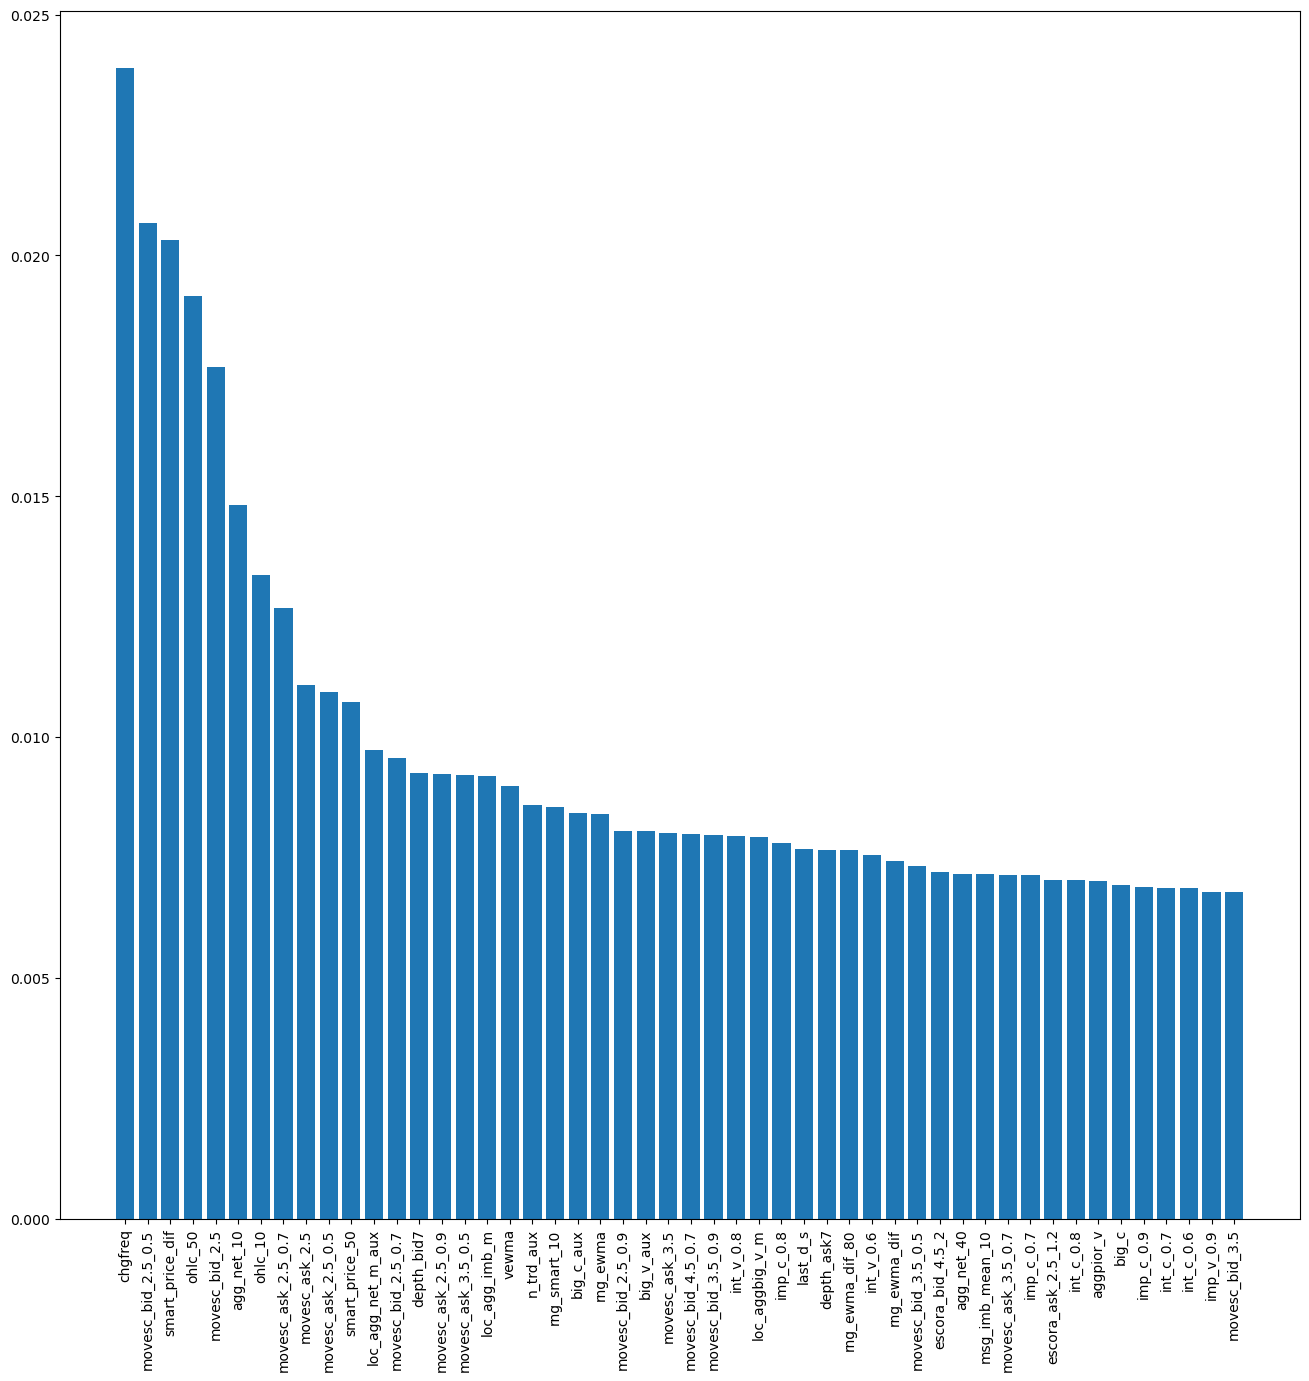

In [41]:
ft_importance_plot(fmodel, X_train, plot_result=True)


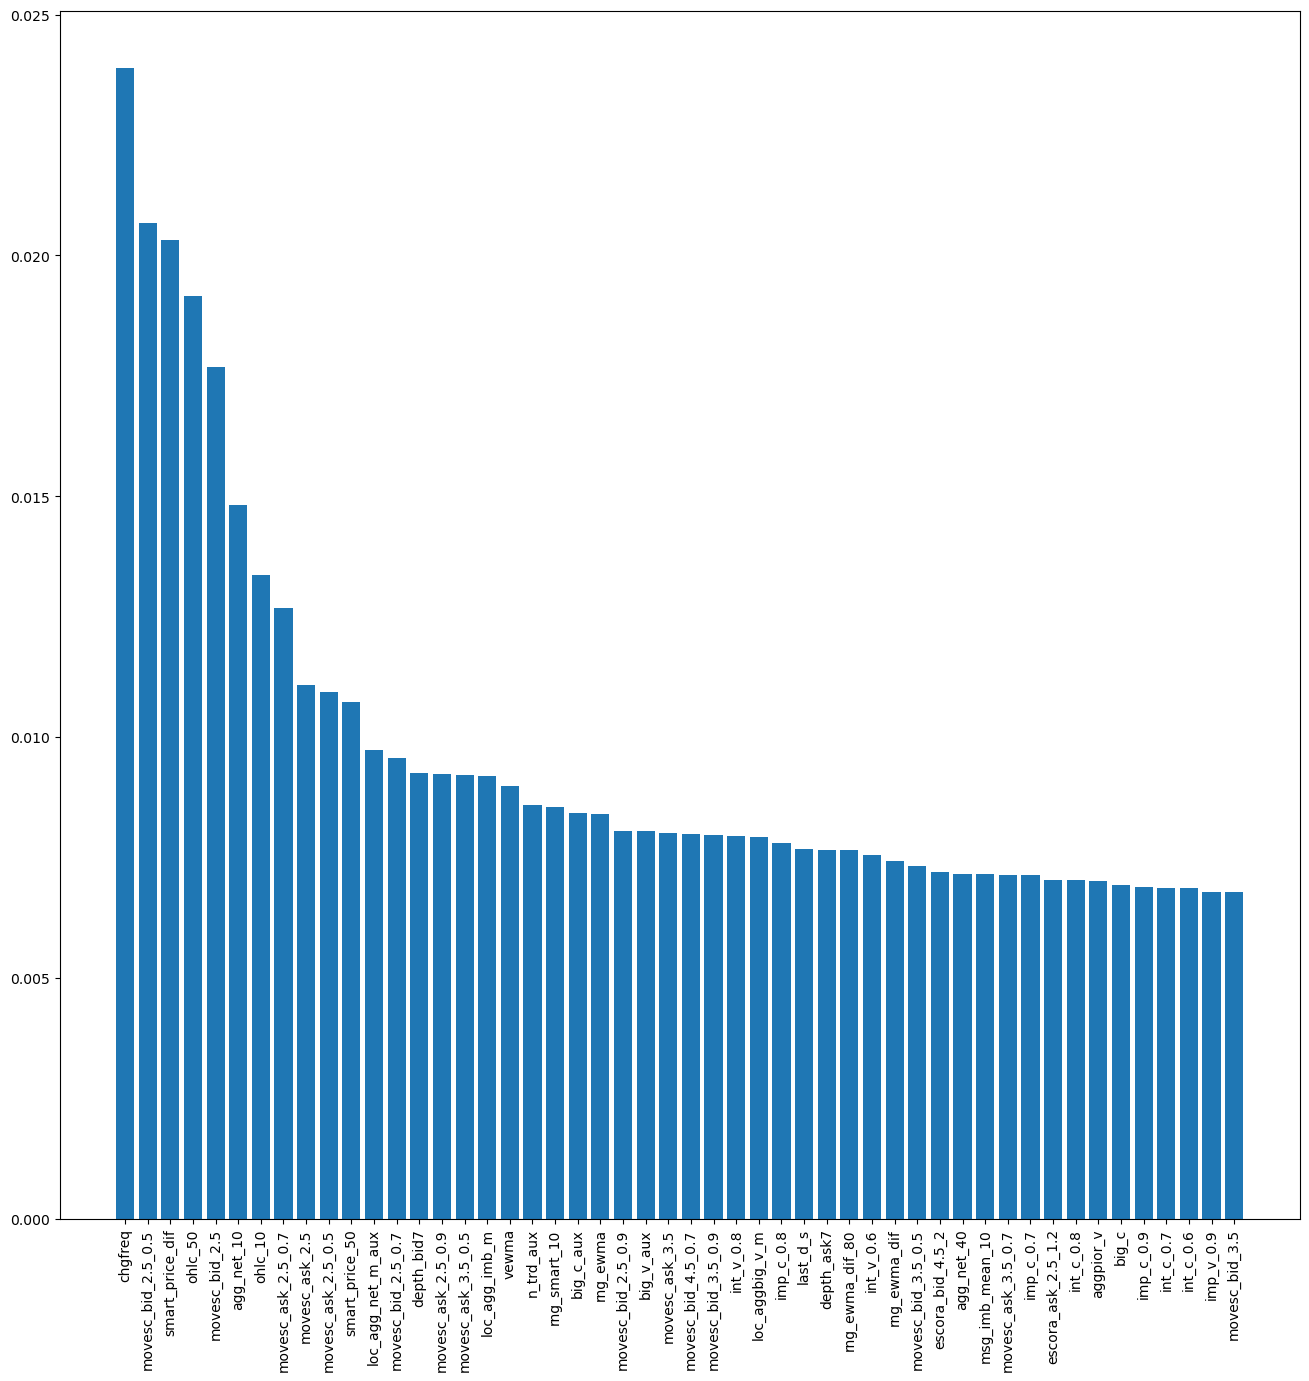

In [42]:
f_imp = ft_importance_plot(fmodel, X_train, plot_result=True)


In [43]:
f_imp.head(50)

,cols,importance
33,chgfreq,0.024
121,movesc_bid_2.5_0.5,0.021
144,smart_price_dif,0.020
149,ohlc_50,0.019
119,movesc_bid_2.5,0.018
153,agg_net_10,0.015
148,ohlc_10,0.013
124,movesc_ask_2.5_0.7,0.013
120,movesc_ask_2.5,0.011
122,movesc_ask_2.5_0.5,0.011


In [44]:
f_imp['importance'] > 0.01

33      True
121     True
144     True
149     True
119     True
       ...  
40     False
76     False
75     False
71     False
92     False
Name: importance, Length: 170, dtype: bool

In [45]:
f_imp.loc[f_imp['importance'] > 0.01]

,cols,importance
33,chgfreq,0.024
121,movesc_bid_2.5_0.5,0.021
144,smart_price_dif,0.020
149,ohlc_50,0.019
119,movesc_bid_2.5,0.018
153,agg_net_10,0.015
148,ohlc_10,0.013
124,movesc_ask_2.5_0.7,0.013
120,movesc_ask_2.5,0.011
122,movesc_ask_2.5_0.5,0.011


In [46]:
f_imp.loc[f_imp['importance'] > 0.01, cols]

NameError: name 'cols' is not defined

In [47]:
f_imp.loc[f_imp['importance'] > 0.01, 'cols']

33                chgfreq
121    movesc_bid_2.5_0.5
144       smart_price_dif
149               ohlc_50
119        movesc_bid_2.5
153            agg_net_10
148               ohlc_10
124    movesc_ask_2.5_0.7
120        movesc_ask_2.5
122    movesc_ask_2.5_0.5
145        smart_price_50
Name: cols, dtype: object

In [48]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score, average_precision_score


In [49]:
def save_models(model, s_name, s_path):

  file_to_store = open(s_path + s_name + ".pkl", "wb")
  pickle.dump(model, file_to_store)
  file_to_store.close()


def load_models(s_name, s_path):

  file_to_store = open(s_path + s_name + ".pkl", "rb")
  model_object = pickle.load(file_to_store)
  file_to_store.close()

  return model_object


def base_norm(base, clip=0.001, norm_cols=[]):

  mup_perc = base.describe(percentiles=[clip,(1.0-clip)]).iloc[[4,6]]
  
  if 'y' in list(base.columns):
    mup_clip = base.drop(['y'], axis=1).copy()
  else:
    mup_clip = base.copy()
  
  cols = mup_clip.columns if norm_cols == [] else norm_cols
  for col in cols:
      mup_clip[col] = base[col].clip(mup_perc.iloc[0][col], mup_perc.iloc[1][col])
      mup_clip[col] = (mup_clip[col]-mup_clip[col].mean())/mup_clip[col].std()

  mup_clip.fillna(0.0, inplace=True)

  return mup_clip


def ft_importance_plot(model, base, plot_result=True):

  imp = pd.DataFrame({'cols':base.columns.tolist(), 'importance': model.feature_importances_})
  imp.sort_values(by=['importance'], inplace=True, ascending=False)
  
  if plot_result:
    plot_importance(imp)

  return imp  


def plot_importance(rf_imp):

  rf_imp_main = rf_imp.head(50)
  plt.figure(dpi=100, figsize=(16, 16))
  plt.bar(np.arange(rf_imp_main.shape[0]), rf_imp_main['importance'])
  plt.xticks(np.arange(rf_imp_main.shape[0]), rf_imp_main['cols'].tolist(), rotation = 90)


def optimize_threshold(y_true, y_prob):

  accuracies = []
  thresholds = np.arange(0.2,1,0.1)
  
  for th in thresholds:
    y_pred = np.greater(y_prob, th).astype(int)
    # acc = f1_score(y_true, y_pred)
    acc = average_precision_score(y_true, y_pred)
    accuracies.append(acc)
  
  accuracies = np.array(accuracies)
  # max_accuracy = accuracies.max() 
  th_max_acc = thresholds[accuracies.argmax()]
  yhat_th = np.greater(y_prob, th_max_acc).astype(int)

  return yhat_th, th_max_acc


def yhat_threshold(y_prob, th):
  
  yhat_th = np.greater(y_prob, th).astype(int)
  
  return yhat_th


def report_results(X_train, X_test, y_train, y_test, fitted_model=None, th=0.0, verbose=True, y_prob_train=None, y_prob_test=None, ready_probs = False):

  if not ready_probs:
    y_prob_train = fitted_model.predict_proba(X_train)[:, 1]
    y_prob_test = fitted_model.predict_proba(X_test)[:, 1]

  if th == 0.0:
    yhat_train, th = optimize_threshold(y_train, y_prob_train)  # passing probs and getting integers y 
  else:
    yhat_train = yhat_threshold(y_prob_train,th)
    
  train_auc = roc_auc_score(y_train, y_prob_train)
  train_f1 = f1_score(y_train, yhat_train, average='binary')
  train_f1_balanced = f1_score(y_train, yhat_train, average='weighted')
  cm_train = confusion_matrix(y_train, yhat_train)  # passing integers to CM

  yhat_test = yhat_threshold(y_prob_test,th)
  test_auc = roc_auc_score(y_test, y_prob_test)
  test_f1 = f1_score(y_test, yhat_test, average='binary')
  test_f1_balanced = f1_score(y_test, yhat_test, average='weighted')
  cm_test = confusion_matrix(y_test, yhat_test) 

  ## SHOW SCORES
  if verbose:
    print('train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(train_auc, test_auc, train_auc - test_auc))
    print('train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(train_f1, test_f1, train_f1 - test_f1))
    print('train_f1BL:{:.2f}, test_f1BL:{:.2f} (overfit: {:.2f})'.format(train_f1_balanced, test_f1_balanced, train_f1_balanced - test_f1_balanced))
    print('--------')
    # print('test_auc: {:.3f}, overfit: {:.3f}'.format(test_auc, train_auc - test_auc))
    # print('test_f1: {:.3f}, overfit: {:.3f}'.format(test_f1, train_f1 - test_f1))
    # print('test_f1_balanced: {:.3f}, overfit: {:.3f}'.format(test_f1_balanced, train_f1_balanced - test_f1_balanced))
    # print('--------')
    print('cm_train: ')
    print(cm_train)
    print('cm_test: ')
    print(cm_test)
    print('threshold: {:.1f}'.format(th))
    
  return train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, cm_train, cm_test, yhat_train, yhat_test, th


def rscv_clf(clf, d_params, X_train, y_train, X_test, y_test):
    
    clf_cv = RandomizedSearchCV(estimator=clf, param_distributions=d_params, n_iter=10, 
                              cv=3, verbose=1, return_train_score=True, scoring='roc_auc')  # or roc_auc_ovo_weighted
    clf_cv.fit(X_train, y_train)

    print("\nBest: %f using %s" % (clf_cv.best_score_, clf_cv.best_params_))
    search_means = clf_cv.cv_results_['mean_test_score']
    search_stds = clf_cv.cv_results_['std_test_score']
    search_params = clf_cv.cv_results_['params']
    for mean, stdev, param in zip(search_means, search_stds, search_params):
      print("%f (%f) with: %r" % (mean, stdev, param))

    score_train = clf_cv.cv_results_['mean_train_score'].mean()
    print('[cv] Score on train data: %.3f' % score_train)
    score_test = clf_cv.cv_results_['mean_test_score'].mean()
    print('[cv] Score on test data: %.3f' % score_test)
    
    overfit_devs = abs(clf_cv.cv_results_['mean_train_score'] - clf_cv.cv_results_['mean_test_score'])
    estimate = clf_cv.cv_results_['mean_test_score'] - clf_cv.cv_results_['std_test_score'] / 3 - overfit_devs / 2
    print('just_fit: %.3f' % estimate)

    yhat_train = clf_cv.predict_proba(X_train)[:, 1]
    yhat_test = clf_cv.predict_proba(X_test)[:, 1]

    yhat, th = optimize_threshold(y_train, yhat_train)  # passing probs and getting integers y 
    cm_train = confusion_matrix(y_train, yhat)  # passing integers to CM
    score_is = roc_auc_score(y_train, yhat_train)  # passing probs to roc_auc
    print('Score in sample: %.3f' % score_is)

    yhat, th2 = optimize_threshold(y_test, yhat_test)
    cm_test = confusion_matrix(y_test, yhat)
    score_oos = roc_auc_score(y_test, yhat_test)
    print('Score out of sample: %.3f' % score_oos)

    return [score_train, score_test, score_is, score_oos, clf_cv.best_params_, cm_train, th, cm_test, th2]


def create_dl(learn_rate, layers_drops, regularizer):
    
    keras_dl = Sequential()

    ## LAYER (FIRST)
    keras_dl.add(Dense(layers_drops[0][0], input_dim = ddim, activation = 'relu', 
                kernel_regularizer = regularizers.l2(regularizer)))
    keras_dl.add(BatchNormalization())
    keras_dl.add(Dropout(rate = layers_drops[1][0]))

    # HIDDEN LAYERS
    for i in range(len(layers_drops[0])-1):
        keras_dl.add(Dense(layers_drops[0][i+1], activation = 'relu', 
                    kernel_regularizer = regularizers.l2(regularizer)))
        keras_dl.add(BatchNormalization())
        keras_dl.add(Dropout(rate = layers_drops[1][i+1]))

    ## LAYER (LAST)
    keras_dl.add(Dense(1, activation = 'sigmoid'))

    loss_function = 'binary_crossentropy'
    opt = keras.optimizers.Adam(learning_rate = learn_rate)
    keras_dl.compile(loss=loss_function, optimizer = opt, metrics = [metrics.AUC(),metrics.Accuracy()])

    return keras_dl




In [50]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'map'
                          )

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.67, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.50 (overfit: 0.04)
train_f1BL:0.56, test_f1BL:0.56 (overfit: 0.00)
--------
cm_train: 
[[3718 4468]
 [ 984 3218]]
cm_test: 
[[1017 1050]
 [ 339  692]]
threshold: 0.4


In [51]:

import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
import time 

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier, Pool, sum_models
from sklearn.svm import SVC

import keras
from keras import metrics
from keras import regularizers 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import forest_minimize
from skopt.plots import plot_objective
from skopt.callbacks import DeltaYStopper

pd.set_option('display.max_columns',100)
pd.set_option('precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

d_path = { 'train': 'historical_files\\FeaturesFiles\\',
           'test': 'historical_files\\TestFiles\\'}


In [52]:
class ModelTraining():

  def __init__(self, s_regime, run_model, s_path = d_path['train']):
    self.s_path = s_path
    self.s_regime = s_regime
    self.run_model = run_model
    self.x_train = pd.DataFrame()
    self.y_train = pd.DataFrame()
    self.x_test  = pd.DataFrame()
    self.y_test  = pd.DataFrame()
    self.search_space = []
    self.param_name= []
    self.x_h_train = pd.DataFrame()
    self.x_h_test = pd.DataFrame()

    self.training_init()

    return

  
  def training_init(self):
    '''
      specify:
        ::s_model in ['svm', 'xgb', 'rf']
        ::s_regime in ['mi_up', 'mi_down', 'mw_up', 'mw_down']
    '''
    
    pkl_data = load_models(self.s_regime, self.s_path)  # will search for s_path/s_regime.pkl
    # pkl_data.fillna(0, inplace=True)  # NaN is treated on base_norm()

    X = pkl_data
    y = X.pop('y')

    X = base_norm(X)  # include b_norm = True / False
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

    print('training_init: data load and split complete!')

    return 


    
  def create_search_space(self):

    if self.run_model =='svm':
    ### SVM1
      self.param_name.append('svm1_C') 
      self.search_space.append(Real(1e-6, 100.0, 'log-uniform', name='svm1_C'))
      self.param_name.append('svm1_gamma') 
      self.search_space.append(Real(1e-7, 10.0, 'log-uniform', name='svm1_gamma'))

    if self.run_model =='rf':
    ### RF1
    # atencao; calibrar rf n_estimators maximo antes na mao devido ao tempo
      # X_train = X_m_train
      # X_test = X_m_test
      
      self.param_name.append('rf1_n_estimators') 
      self.search_space.append(Integer(300, 600, name='rf1_n_estimators'))
      self.param_name.append('rf1_max_depth') 
      self.search_space.append(Integer(5, 25, name='rf1_max_depth'))
      self.param_name.append('rf1_min_samples_leaf') 
      self.search_space.append(Integer(5, 50, name='rf1_min_samples_leaf'))
      self.param_name.append('rf1_max_features') 
      self.search_space.append(Categorical(['sqrt', 'log2', 0.5, 0.9], name='rf1_max_features'))
      self.param_name.append('rf1_max_samples') 
      self.search_space.append(Real(0.1, 0.9, name='rf1_max_samples'))
      self.param_name.append('rf1_class_weight') 
      self.search_space.append(Categorical(['balanced_subsample', 'balanced'], name='rf1_class_weight'))

    ### XGB1
    if self.run_model =='xgb':
      # X_train = X_train_raw
      # X_test = X_test_raw

      self.param_name.append('xgb1_max_depth') 
      self.search_space.append(Integer(3, 15, name='xgb1_max_depth'))
      self.param_name.append('xgb1_subsample') 
      self.search_space.append(Real(.3, 1, name='xgb1_subsample'))
      self.param_name.append('xgb1_colsample_bytree') 
      self.search_space.append(Real(.1, .8, name='xgb1_colsample_bytree'))
      self.param_name.append('xgb1_min_child_weight') 
      self.search_space.append(Integer(1, 30, name='xgb1_min_child_weight'))
      self.param_name.append('xgb1_learning_rate') 
      self.search_space.append(Real(1e-4, 0.5, 'log-uniform', name='xgb1_learning_rate'))
      self.param_name.append('xgb1_n_estimators') 
      self.search_space.append(Integer(200, 2000, name='xgb1_n_estimators'))
      self.param_name.append('xgb1_gamma') ## related to trees pruning... cannot be too high
      self.search_space.append(Integer(0, 5, name='xgb1_gamma'))
      self.param_name.append('xgb1_reg_alpha') 
      self.search_space.append(Real(0., 10., name='xgb1_reg_alpha'))
      self.param_name.append('xgb1_scale_pos_weight') 
      self.search_space.append(Real(5., 15., name='xgb1_scale_pos_weight'))

    # self.search_space.append(Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'))
    # self.search_space.append(Integer(1, 5, name='degree'))

    return 
  

  def evaluate_model(self,**params):
    # configure the model with specific hyperparameters
    # model = SVC()
    # model.set_params(C=params['C'], gamma=params['gamma'])
    # ('rf1', RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample',
    #           n_estimators = params['rf1_n_estimators'], max_depth = params['rf1_max_depth'],
    #           min_samples_leaf = params['rf1_min_samples_leaf'], max_features = params['rf1_max_features'],
    #           criterion = params['rf1_criterion'], max_samples = params['rf1_max_samples'])),

    if self.run_model =='xgb':
      model = xgb.XGBClassifier(objective='binary:logistic',
                      use_label_encoder=False, 
                      eval_metric = 'aucpr',
                      n_jobs=-1,
                      tree_method='hist',
                      n_estimators=params['xgb1_n_estimators'],
                      colsample_bytree=params['xgb1_colsample_bytree'],
                      subsample=params['xgb1_subsample'],
                      learning_rate=params['xgb1_learning_rate'],
                      max_depth=params['xgb1_max_depth'],
                      gamma=params['xgb1_gamma'],
                      reg_alpha=params['xgb1_reg_alpha'],
                      min_child_weight=params['xgb1_min_child_weight'],
                      scale_pos_weight=params['xgb1_scale_pos_weight'],
                      verbosity=0)
    
    elif self.run_model =='rf':
      model = RandomForestClassifier(n_jobs=-1, class_weight=params['rf1_class_weight'],
                            n_estimators = params['rf1_n_estimators'], 
                            max_depth = params['rf1_max_depth'],
                            min_samples_leaf = params['rf1_min_samples_leaf'], 
                            max_features = params['rf1_max_features'],
                            max_samples = params['rf1_max_samples'])
    
    elif self.run_model =='svm':
      model = SVC(C=params['svm1_C'], gamma=params['svm1_gamma'], probability=True, 
                  class_weight='balanced', cache_size=1000)
    
    # cv_results = cross_val_score(model, X_TRAIN, Y_TRAIN, cv=4, n_jobs=-1, scoring='f1')
    # scoring: valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 
    #  'log_loss', 'mean_absolute_error', 'mean_squared_error', 'precision', 'r2', 'recall', 'roc_auc']

    cv_results = cross_validate(model, self.x_train, self.y_train, cv=4, n_jobs=-1, scoring='f1', return_train_score= True)

    overfit_devs = abs(cv_results['train_score'].mean() - cv_results['test_score'].mean())
    estimate = cv_results['test_score'].mean() - cv_results['test_score'].std() / 3 - overfit_devs / 2

    # calculate the mean of the scores
    # estimate = np.mean(result)

    # convert from a maximizing score to a minimizing score
    return 1.0 - estimate


  def optimized_training(self):

    start_time = time.time()
    self.create_search_space()
    
    @use_named_args(dimensions=self.search_space)
    def fitness_wrapper(**kwargs):
      return self.evaluate_model(**kwargs)

    result = forest_minimize(fitness_wrapper, self.search_space, n_calls=20, n_jobs=-1, verbose=1, 
                              kappa=2.00, callback=DeltaYStopper(0.002, n_best=5))
    
    # summarizing finding:
    print('\noptimize_train():')
    print('Best Metric: %.3f' % (1.0 - result.fun))
    for i, val in enumerate(result.x):
      print('{}: {}'.format(self.param_name[i],val))
    print('execution time: {}'.format((time.time() - start_time)/60.))

    # result.x_iters
    # result.func_vals
    # plot optimized models
    # plot_objective(result, size=4)

    # run_best_params(s_model, result, param_name)

  
  def run_individual(self):

    l_score = []
    start_time = time.time()
    # ft_p = [['int_c_0.7', 'int_v', 'imp_c_0.9', 'imp_v', 'big_v', 'agg_net_m', 'loc_aggbig_saldo_d', 'PA_up', 'aggpior_c', 'pagg_c_best_0.7', 'escora_bid_3.5_2', 'escora_ask_2.5_1.2', 'movesc_bid_4.5', 'movesc_ask_2.5_0.9', 'escora_ask_4.5_2'],]
    ft_p = [self.x_train.columns.to_list(),]    # may include sets of features combinations here to run for each of them

    for l_ft in ft_p:
      print('\nModels will be evaluated using:')
      print(l_ft)

      # l_score has the following columns: 
      #   'model_type': 'svm', 
      #   'features': l_ft,
      #   'best_params': best,
      #   'score_is': s_is,
      #   'score_oos': s_oos

      print('---- KNN ---')
      knn = KNeighborsClassifier(algorithm='auto', n_jobs=-1)
      params = {'n_neighbors': [1, 2, 5, 10],
                'metric': ['minkowski', 'braycurtis'],
                'weights': ['uniform', 'distance']
                }
      l_return = rscv_clf(knn, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      l_score.append(['knn', l_ft] + l_return)


      print('---- SVM ---')
      svm = SVC(probability=True, class_weight='balanced', cache_size=1000, verbose=0)
      params = {'C': [.1, .5, 1, 10, 100], 
                'gamma': [0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6]
                }
      l_return = rscv_clf(svm, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      l_score.append(['svm', l_ft] + l_return)


      print('---- RFC ---')
      rfc = RandomForestClassifier(verbose=0, random_state=1, oob_score=True, n_jobs=-1, class_weight='balanced_subsample')
      # TODO: learn more about class_weight
      params = {'n_estimators': [50, 100, 300],
                'max_depth': [3, 8, 10, 17],
                'min_samples_split': [2, 10, 20],
                'min_samples_leaf': [1, 10, 50],
                'max_features': ['sqrt', 'log2', 0.1, 0.9],
                'criterion': ['gini', 'entropy'],
                'max_samples': [0.2, 0.5, 0.7, 0.9]
                }
      l_return = rscv_clf(rfc, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      l_score.append(['rfc', l_ft] + l_return)
      

      # print('---- GBM ---')
      # gbm = GradientBoostingClassifier(verbose=0, random_state=1)
      # params = {'learning_rate': [.1, .2, .3], 
      #           'n_estimators': [100, 300, 500],
      #           'subsample': [.5, .75, 1]
      #           }
      # l_return = rscv_clf(gbm, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      # l_score.append(['gbm', l_ft] + l_return)


      print('---- XGB ---')
      # data_dmatrix = xgb.DMatrix(data= self.x_train[l_ft], label=dy)
      params = {'colsample_bytree': [0.5, 0.7, 1],
                'subsample': [0.5, 1],
                'learning_rate': [0.1, 0.2, 0.3],
                'max_depth': [4, 6, 8], 
                'lambda': [1, 2, 3],   # L2
                'alpha': [0, 1, 10],   # L1
                'gamma': [0.5, 1, 1.5, 2, 5],
                'tree_method': ['auto', 'hist']  # TODO: to use gpu-hist needs to install package using pip
                }
      xgb_c = xgb.XGBClassifier(n_estimators=600, objective='binary:logistic', max_delta_step= 1,
                                eval_metric='auc',use_label_encoder=False)
      l_return = rscv_clf(xgb_c, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      l_score.append(['xgb', l_ft] + l_return)


      print('---- DLK ---')
      layers_drops = []
      n_layers_drops = 15
      p98_n_layers = 10
      p98_2n_layer_nodes = 10 # it means layer size <= 2**p98_2n_layer_nodes (98% conf)
      for j in range(n_layers_drops):
        n_layers = abs(int(np.random.randn() * p98_n_layers / 2.36))+1
        layers = []
        drops = []
        for i in range(n_layers):
          layers.append(2**(abs(int(np.random.randn() * p98_2n_layer_nodes / 2.36))+2))
          drops.append(np.random.random() * .6)
        layers_drops.append((tuple(layers), tuple(drops)))
      params = {'learn_rate': [.005, .01, .05], 
                'layers_drops': layers_drops, 
                'regularizer': [0.0001, 0.001, 0.1, 1],
                'epochs':  [20, 10], 
                'batch_size': [32, 64, 256]
                }
      
      global ddim 
      ddim = self.x_train.shape[1] 
      dl = KerasClassifier(build_fn=create_dl, verbose=0) 
      l_return = rscv_clf(dl, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      l_score.append(['dl_k', l_ft] + l_return)


      # exporting features, models and scores
      df_score = pd.DataFrame(l_score, columns=['model_type', 'features', 'score_train_cv', 'score_test_cv', 
                                                'score_is', 'score_oos', 'best_params', 'cm_is', 'th_train',
                                                'cm_oos', 'th_test'])
      # df_score['regime'] = md
      # s_file = self.s_path + 'score_details.csv'
      # b_head = True  # print header
      # if os.path.exists(s_path + 'score_details.csv'): b_head= False 
      # df_score.to_csv(s_file, mode='a', header=b_head)
      print(df_score)

      print('\n[{}] Execution time: {}'.format(self.s_regime, time.time() - start_time))






In [53]:
def save_models(model, s_name, s_path):

  file_to_store = open(s_path + s_name + ".pkl", "wb")
  pickle.dump(model, file_to_store)
  file_to_store.close()


def load_models(s_name, s_path):

  file_to_store = open(s_path + s_name + ".pkl", "rb")
  model_object = pickle.load(file_to_store)
  file_to_store.close()

  return model_object


def base_norm(base, clip=0.001, norm_cols=[]):

  mup_perc = base.describe(percentiles=[clip,(1.0-clip)]).iloc[[4,6]]
  
  if 'y' in list(base.columns):
    mup_clip = base.drop(['y'], axis=1).copy()
  else:
    mup_clip = base.copy()
  
  cols = mup_clip.columns if norm_cols == [] else norm_cols
  for col in cols:
      mup_clip[col] = base[col].clip(mup_perc.iloc[0][col], mup_perc.iloc[1][col])
      mup_clip[col] = (mup_clip[col]-mup_clip[col].mean())/mup_clip[col].std()

  mup_clip.fillna(0.0, inplace=True)

  return mup_clip


def ft_importance_plot(model, base, plot_result=True):

  imp = pd.DataFrame({'cols':base.columns.tolist(), 'importance': model.feature_importances_})
  imp.sort_values(by=['importance'], inplace=True, ascending=False)
  
  if plot_result:
    plot_importance(imp)

  return imp  


def plot_importance(rf_imp):

  rf_imp_main = rf_imp.head(50)
  plt.figure(dpi=100, figsize=(16, 16))
  plt.bar(np.arange(rf_imp_main.shape[0]), rf_imp_main['importance'])
  plt.xticks(np.arange(rf_imp_main.shape[0]), rf_imp_main['cols'].tolist(), rotation = 90)


def optimize_threshold(y_true, y_prob):

  accuracies = []
  thresholds = np.arange(0.2,1,0.1)
  
  for th in thresholds:
    y_pred = np.greater(y_prob, th).astype(int)
    # acc = f1_score(y_true, y_pred)
    acc = average_precision_score(y_true, y_pred)
    accuracies.append(acc)
  
  accuracies = np.array(accuracies)
  # max_accuracy = accuracies.max() 
  th_max_acc = thresholds[accuracies.argmax()]
  yhat_th = np.greater(y_prob, th_max_acc).astype(int)

  return yhat_th, th_max_acc


def yhat_threshold(y_prob, th):
  
  yhat_th = np.greater(y_prob, th).astype(int)
  
  return yhat_th


def report_results(X_train, X_test, y_train, y_test, fitted_model=None, th=0.0, verbose=True, y_prob_train=None, y_prob_test=None, ready_probs = False):

  if not ready_probs:
    y_prob_train = fitted_model.predict_proba(X_train)[:, 1]
    y_prob_test = fitted_model.predict_proba(X_test)[:, 1]

  if th == 0.0:
    yhat_train, th = optimize_threshold(y_train, y_prob_train)  # passing probs and getting integers y 
  else:
    yhat_train = yhat_threshold(y_prob_train,th)
    
  train_auc = roc_auc_score(y_train, y_prob_train)
  train_f1 = f1_score(y_train, yhat_train, average='binary')
  train_f1_balanced = f1_score(y_train, yhat_train, average='weighted')
  cm_train = confusion_matrix(y_train, yhat_train)  # passing integers to CM

  yhat_test = yhat_threshold(y_prob_test,th)
  test_auc = roc_auc_score(y_test, y_prob_test)
  test_f1 = f1_score(y_test, yhat_test, average='binary')
  test_f1_balanced = f1_score(y_test, yhat_test, average='weighted')
  cm_test = confusion_matrix(y_test, yhat_test) 

  ## SHOW SCORES
  if verbose:
    print('train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(train_auc, test_auc, train_auc - test_auc))
    print('train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(train_f1, test_f1, train_f1 - test_f1))
    print('train_f1BL:{:.2f}, test_f1BL:{:.2f} (overfit: {:.2f})'.format(train_f1_balanced, test_f1_balanced, train_f1_balanced - test_f1_balanced))
    print('--------')
    # print('test_auc: {:.3f}, overfit: {:.3f}'.format(test_auc, train_auc - test_auc))
    # print('test_f1: {:.3f}, overfit: {:.3f}'.format(test_f1, train_f1 - test_f1))
    # print('test_f1_balanced: {:.3f}, overfit: {:.3f}'.format(test_f1_balanced, train_f1_balanced - test_f1_balanced))
    # print('--------')
    print('cm_train: ')
    print(cm_train)
    print('cm_test: ')
    print(cm_test)
    print('threshold: {:.1f}'.format(th))
    
  return train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, cm_train, cm_test, yhat_train, yhat_test, th


def rscv_clf(clf, d_params, X_train, y_train, X_test, y_test):
    
    clf_cv = RandomizedSearchCV(estimator=clf, param_distributions=d_params, n_iter=10, 
                              cv=3, verbose=1, return_train_score=True, scoring='roc_auc')  # or roc_auc_ovo_weighted
    clf_cv.fit(X_train, y_train)

    print("\nBest: %f using %s" % (clf_cv.best_score_, clf_cv.best_params_))
    search_means = clf_cv.cv_results_['mean_test_score']
    search_stds = clf_cv.cv_results_['std_test_score']
    search_params = clf_cv.cv_results_['params']
    for mean, stdev, param in zip(search_means, search_stds, search_params):
      print("%f (%f) with: %r" % (mean, stdev, param))

    score_train = clf_cv.cv_results_['mean_train_score'].mean()
    print('[cv] Score on train data: %.3f' % score_train)
    score_test = clf_cv.cv_results_['mean_test_score'].mean()
    print('[cv] Score on test data: %.3f' % score_test)
    
    overfit_devs = abs(clf_cv.cv_results_['mean_train_score'] - clf_cv.cv_results_['mean_test_score'])
    estimate = clf_cv.cv_results_['mean_test_score'] - clf_cv.cv_results_['std_test_score'] / 3 - overfit_devs / 2
    print('just_fit: %.3f' % estimate)

    yhat_train = clf_cv.predict_proba(X_train)[:, 1]
    yhat_test = clf_cv.predict_proba(X_test)[:, 1]

    yhat, th = optimize_threshold(y_train, yhat_train)  # passing probs and getting integers y 
    cm_train = confusion_matrix(y_train, yhat)  # passing integers to CM
    score_is = roc_auc_score(y_train, yhat_train)  # passing probs to roc_auc
    print('Score in sample: %.3f' % score_is)

    yhat, th2 = optimize_threshold(y_test, yhat_test)
    cm_test = confusion_matrix(y_test, yhat)
    score_oos = roc_auc_score(y_test, yhat_test)
    print('Score out of sample: %.3f' % score_oos)

    return [score_train, score_test, score_is, score_oos, clf_cv.best_params_, cm_train, th, cm_test, th2]


def create_dl(learn_rate, layers_drops, regularizer):
    
    keras_dl = Sequential()

    ## LAYER (FIRST)
    keras_dl.add(Dense(layers_drops[0][0], input_dim = ddim, activation = 'relu', 
                kernel_regularizer = regularizers.l2(regularizer)))
    keras_dl.add(BatchNormalization())
    keras_dl.add(Dropout(rate = layers_drops[1][0]))

    # HIDDEN LAYERS
    for i in range(len(layers_drops[0])-1):
        keras_dl.add(Dense(layers_drops[0][i+1], activation = 'relu', 
                    kernel_regularizer = regularizers.l2(regularizer)))
        keras_dl.add(BatchNormalization())
        keras_dl.add(Dropout(rate = layers_drops[1][i+1]))

    ## LAYER (LAST)
    keras_dl.add(Dense(1, activation = 'sigmoid'))

    loss_function = 'binary_crossentropy'
    opt = keras.optimizers.Adam(learning_rate = learn_rate)
    keras_dl.compile(loss=loss_function, optimizer = opt, metrics = [metrics.AUC(),metrics.Accuracy()])

    return keras_dl




In [54]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'map'
                          )

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.67, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.50 (overfit: 0.04)
train_f1BL:0.56, test_f1BL:0.56 (overfit: 0.00)
--------
cm_train: 
[[3718 4468]
 [ 984 3218]]
cm_test: 
[[1017 1050]
 [ 339  692]]
threshold: 0.4


In [55]:

import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
import time 

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, accuracy_score, average_precision_score, fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier, Pool, sum_models
from sklearn.svm import SVC

import keras
from keras import metrics
from keras import regularizers 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import forest_minimize
from skopt.plots import plot_objective
from skopt.callbacks import DeltaYStopper

pd.set_option('display.max_columns',100)
pd.set_option('precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

d_path = { 'train': 'historical_files\\FeaturesFiles\\',
           'test': 'historical_files\\TestFiles\\'}


In [56]:
class ModelTraining():

  def __init__(self, s_regime, run_model, s_path = d_path['train']):
    self.s_path = s_path
    self.s_regime = s_regime
    self.run_model = run_model
    self.x_train = pd.DataFrame()
    self.y_train = pd.DataFrame()
    self.x_test  = pd.DataFrame()
    self.y_test  = pd.DataFrame()
    self.search_space = []
    self.param_name= []
    self.x_h_train = pd.DataFrame()
    self.x_h_test = pd.DataFrame()

    self.training_init()

    return

  
  def training_init(self):
    '''
      specify:
        ::s_model in ['svm', 'xgb', 'rf']
        ::s_regime in ['mi_up', 'mi_down', 'mw_up', 'mw_down']
    '''
    
    pkl_data = load_models(self.s_regime, self.s_path)  # will search for s_path/s_regime.pkl
    # pkl_data.fillna(0, inplace=True)  # NaN is treated on base_norm()

    X = pkl_data
    y = X.pop('y')

    X = base_norm(X)  # include b_norm = True / False
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

    print('training_init: data load and split complete!')

    return 


    
  def create_search_space(self):

    if self.run_model =='svm':
    ### SVM1
      self.param_name.append('svm1_C') 
      self.search_space.append(Real(1e-6, 100.0, 'log-uniform', name='svm1_C'))
      self.param_name.append('svm1_gamma') 
      self.search_space.append(Real(1e-7, 10.0, 'log-uniform', name='svm1_gamma'))

    if self.run_model =='rf':
    ### RF1
    # atencao; calibrar rf n_estimators maximo antes na mao devido ao tempo
      # X_train = X_m_train
      # X_test = X_m_test
      
      self.param_name.append('rf1_n_estimators') 
      self.search_space.append(Integer(300, 600, name='rf1_n_estimators'))
      self.param_name.append('rf1_max_depth') 
      self.search_space.append(Integer(5, 25, name='rf1_max_depth'))
      self.param_name.append('rf1_min_samples_leaf') 
      self.search_space.append(Integer(5, 50, name='rf1_min_samples_leaf'))
      self.param_name.append('rf1_max_features') 
      self.search_space.append(Categorical(['sqrt', 'log2', 0.5, 0.9], name='rf1_max_features'))
      self.param_name.append('rf1_max_samples') 
      self.search_space.append(Real(0.1, 0.9, name='rf1_max_samples'))
      self.param_name.append('rf1_class_weight') 
      self.search_space.append(Categorical(['balanced_subsample', 'balanced'], name='rf1_class_weight'))

    ### XGB1
    if self.run_model =='xgb':
      # X_train = X_train_raw
      # X_test = X_test_raw

      self.param_name.append('xgb1_max_depth') 
      self.search_space.append(Integer(3, 15, name='xgb1_max_depth'))
      self.param_name.append('xgb1_subsample') 
      self.search_space.append(Real(.3, 1, name='xgb1_subsample'))
      self.param_name.append('xgb1_colsample_bytree') 
      self.search_space.append(Real(.1, .8, name='xgb1_colsample_bytree'))
      self.param_name.append('xgb1_min_child_weight') 
      self.search_space.append(Integer(1, 30, name='xgb1_min_child_weight'))
      self.param_name.append('xgb1_learning_rate') 
      self.search_space.append(Real(1e-4, 0.5, 'log-uniform', name='xgb1_learning_rate'))
      self.param_name.append('xgb1_n_estimators') 
      self.search_space.append(Integer(200, 2000, name='xgb1_n_estimators'))
      self.param_name.append('xgb1_gamma') ## related to trees pruning... cannot be too high
      self.search_space.append(Integer(0, 5, name='xgb1_gamma'))
      self.param_name.append('xgb1_reg_alpha') 
      self.search_space.append(Real(0., 10., name='xgb1_reg_alpha'))
      self.param_name.append('xgb1_scale_pos_weight') 
      self.search_space.append(Real(5., 15., name='xgb1_scale_pos_weight'))

    # self.search_space.append(Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'))
    # self.search_space.append(Integer(1, 5, name='degree'))

    return 
  

  def evaluate_model(self,**params):
    # configure the model with specific hyperparameters
    # model = SVC()
    # model.set_params(C=params['C'], gamma=params['gamma'])
    # ('rf1', RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample',
    #           n_estimators = params['rf1_n_estimators'], max_depth = params['rf1_max_depth'],
    #           min_samples_leaf = params['rf1_min_samples_leaf'], max_features = params['rf1_max_features'],
    #           criterion = params['rf1_criterion'], max_samples = params['rf1_max_samples'])),

    if self.run_model =='xgb':
      model = xgb.XGBClassifier(objective='binary:logistic',
                      use_label_encoder=False, 
                      eval_metric = 'aucpr',
                      n_jobs=-1,
                      tree_method='hist',
                      n_estimators=params['xgb1_n_estimators'],
                      colsample_bytree=params['xgb1_colsample_bytree'],
                      subsample=params['xgb1_subsample'],
                      learning_rate=params['xgb1_learning_rate'],
                      max_depth=params['xgb1_max_depth'],
                      gamma=params['xgb1_gamma'],
                      reg_alpha=params['xgb1_reg_alpha'],
                      min_child_weight=params['xgb1_min_child_weight'],
                      scale_pos_weight=params['xgb1_scale_pos_weight'],
                      verbosity=0)
    
    elif self.run_model =='rf':
      model = RandomForestClassifier(n_jobs=-1, class_weight=params['rf1_class_weight'],
                            n_estimators = params['rf1_n_estimators'], 
                            max_depth = params['rf1_max_depth'],
                            min_samples_leaf = params['rf1_min_samples_leaf'], 
                            max_features = params['rf1_max_features'],
                            max_samples = params['rf1_max_samples'])
    
    elif self.run_model =='svm':
      model = SVC(C=params['svm1_C'], gamma=params['svm1_gamma'], probability=True, 
                  class_weight='balanced', cache_size=1000)
    
    # cv_results = cross_val_score(model, X_TRAIN, Y_TRAIN, cv=4, n_jobs=-1, scoring='f1')
    # scoring: valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 
    #  'log_loss', 'mean_absolute_error', 'mean_squared_error', 'precision', 'r2', 'recall', 'roc_auc']

    cv_results = cross_validate(model, self.x_train, self.y_train, cv=4, n_jobs=-1, scoring='f1', return_train_score= True)

    overfit_devs = abs(cv_results['train_score'].mean() - cv_results['test_score'].mean())
    estimate = cv_results['test_score'].mean() - cv_results['test_score'].std() / 3 - overfit_devs / 2

    # calculate the mean of the scores
    # estimate = np.mean(result)

    # convert from a maximizing score to a minimizing score
    return 1.0 - estimate


  def optimized_training(self):

    start_time = time.time()
    self.create_search_space()
    
    @use_named_args(dimensions=self.search_space)
    def fitness_wrapper(**kwargs):
      return self.evaluate_model(**kwargs)

    result = forest_minimize(fitness_wrapper, self.search_space, n_calls=20, n_jobs=-1, verbose=1, 
                              kappa=2.00, callback=DeltaYStopper(0.002, n_best=5))
    
    # summarizing finding:
    print('\noptimize_train():')
    print('Best Metric: %.3f' % (1.0 - result.fun))
    for i, val in enumerate(result.x):
      print('{}: {}'.format(self.param_name[i],val))
    print('execution time: {}'.format((time.time() - start_time)/60.))

    # result.x_iters
    # result.func_vals
    # plot optimized models
    # plot_objective(result, size=4)

    # run_best_params(s_model, result, param_name)

  
  def run_individual(self):

    l_score = []
    start_time = time.time()
    # ft_p = [['int_c_0.7', 'int_v', 'imp_c_0.9', 'imp_v', 'big_v', 'agg_net_m', 'loc_aggbig_saldo_d', 'PA_up', 'aggpior_c', 'pagg_c_best_0.7', 'escora_bid_3.5_2', 'escora_ask_2.5_1.2', 'movesc_bid_4.5', 'movesc_ask_2.5_0.9', 'escora_ask_4.5_2'],]
    ft_p = [self.x_train.columns.to_list(),]    # may include sets of features combinations here to run for each of them

    for l_ft in ft_p:
      print('\nModels will be evaluated using:')
      print(l_ft)

      # l_score has the following columns: 
      #   'model_type': 'svm', 
      #   'features': l_ft,
      #   'best_params': best,
      #   'score_is': s_is,
      #   'score_oos': s_oos

      print('---- KNN ---')
      knn = KNeighborsClassifier(algorithm='auto', n_jobs=-1)
      params = {'n_neighbors': [1, 2, 5, 10],
                'metric': ['minkowski', 'braycurtis'],
                'weights': ['uniform', 'distance']
                }
      l_return = rscv_clf(knn, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      l_score.append(['knn', l_ft] + l_return)


      print('---- SVM ---')
      svm = SVC(probability=True, class_weight='balanced', cache_size=1000, verbose=0)
      params = {'C': [.1, .5, 1, 10, 100], 
                'gamma': [0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6]
                }
      l_return = rscv_clf(svm, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      l_score.append(['svm', l_ft] + l_return)


      print('---- RFC ---')
      rfc = RandomForestClassifier(verbose=0, random_state=1, oob_score=True, n_jobs=-1, class_weight='balanced_subsample')
      # TODO: learn more about class_weight
      params = {'n_estimators': [50, 100, 300],
                'max_depth': [3, 8, 10, 17],
                'min_samples_split': [2, 10, 20],
                'min_samples_leaf': [1, 10, 50],
                'max_features': ['sqrt', 'log2', 0.1, 0.9],
                'criterion': ['gini', 'entropy'],
                'max_samples': [0.2, 0.5, 0.7, 0.9]
                }
      l_return = rscv_clf(rfc, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      l_score.append(['rfc', l_ft] + l_return)
      

      # print('---- GBM ---')
      # gbm = GradientBoostingClassifier(verbose=0, random_state=1)
      # params = {'learning_rate': [.1, .2, .3], 
      #           'n_estimators': [100, 300, 500],
      #           'subsample': [.5, .75, 1]
      #           }
      # l_return = rscv_clf(gbm, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      # l_score.append(['gbm', l_ft] + l_return)


      print('---- XGB ---')
      # data_dmatrix = xgb.DMatrix(data= self.x_train[l_ft], label=dy)
      params = {'colsample_bytree': [0.5, 0.7, 1],
                'subsample': [0.5, 1],
                'learning_rate': [0.1, 0.2, 0.3],
                'max_depth': [4, 6, 8], 
                'lambda': [1, 2, 3],   # L2
                'alpha': [0, 1, 10],   # L1
                'gamma': [0.5, 1, 1.5, 2, 5],
                'tree_method': ['auto', 'hist']  # TODO: to use gpu-hist needs to install package using pip
                }
      xgb_c = xgb.XGBClassifier(n_estimators=600, objective='binary:logistic', max_delta_step= 1,
                                eval_metric='auc',use_label_encoder=False)
      l_return = rscv_clf(xgb_c, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      l_score.append(['xgb', l_ft] + l_return)


      print('---- DLK ---')
      layers_drops = []
      n_layers_drops = 15
      p98_n_layers = 10
      p98_2n_layer_nodes = 10 # it means layer size <= 2**p98_2n_layer_nodes (98% conf)
      for j in range(n_layers_drops):
        n_layers = abs(int(np.random.randn() * p98_n_layers / 2.36))+1
        layers = []
        drops = []
        for i in range(n_layers):
          layers.append(2**(abs(int(np.random.randn() * p98_2n_layer_nodes / 2.36))+2))
          drops.append(np.random.random() * .6)
        layers_drops.append((tuple(layers), tuple(drops)))
      params = {'learn_rate': [.005, .01, .05], 
                'layers_drops': layers_drops, 
                'regularizer': [0.0001, 0.001, 0.1, 1],
                'epochs':  [20, 10], 
                'batch_size': [32, 64, 256]
                }
      
      global ddim 
      ddim = self.x_train.shape[1] 
      dl = KerasClassifier(build_fn=create_dl, verbose=0) 
      l_return = rscv_clf(dl, params, self.x_train[l_ft], self.y_train, self.x_test[l_ft], self.y_test)
      l_score.append(['dl_k', l_ft] + l_return)


      # exporting features, models and scores
      df_score = pd.DataFrame(l_score, columns=['model_type', 'features', 'score_train_cv', 'score_test_cv', 
                                                'score_is', 'score_oos', 'best_params', 'cm_is', 'th_train',
                                                'cm_oos', 'th_test'])
      # df_score['regime'] = md
      # s_file = self.s_path + 'score_details.csv'
      # b_head = True  # print header
      # if os.path.exists(s_path + 'score_details.csv'): b_head= False 
      # df_score.to_csv(s_file, mode='a', header=b_head)
      print(df_score)

      print('\n[{}] Execution time: {}'.format(self.s_regime, time.time() - start_time))






In [57]:
def save_models(model, s_name, s_path):

  file_to_store = open(s_path + s_name + ".pkl", "wb")
  pickle.dump(model, file_to_store)
  file_to_store.close()


def load_models(s_name, s_path):

  file_to_store = open(s_path + s_name + ".pkl", "rb")
  model_object = pickle.load(file_to_store)
  file_to_store.close()

  return model_object


def base_norm(base, clip=0.001, norm_cols=[]):

  mup_perc = base.describe(percentiles=[clip,(1.0-clip)]).iloc[[4,6]]
  
  if 'y' in list(base.columns):
    mup_clip = base.drop(['y'], axis=1).copy()
  else:
    mup_clip = base.copy()
  
  cols = mup_clip.columns if norm_cols == [] else norm_cols
  for col in cols:
      mup_clip[col] = base[col].clip(mup_perc.iloc[0][col], mup_perc.iloc[1][col])
      mup_clip[col] = (mup_clip[col]-mup_clip[col].mean())/mup_clip[col].std()

  mup_clip.fillna(0.0, inplace=True)

  return mup_clip


def ft_importance_plot(model, base, plot_result=True):

  imp = pd.DataFrame({'cols':base.columns.tolist(), 'importance': model.feature_importances_})
  imp.sort_values(by=['importance'], inplace=True, ascending=False)
  
  if plot_result:
    plot_importance(imp)

  return imp  


def plot_importance(rf_imp):

  rf_imp_main = rf_imp.head(50)
  plt.figure(dpi=100, figsize=(16, 16))
  plt.bar(np.arange(rf_imp_main.shape[0]), rf_imp_main['importance'])
  plt.xticks(np.arange(rf_imp_main.shape[0]), rf_imp_main['cols'].tolist(), rotation = 90)


def optimize_threshold(y_true, y_prob):

  accuracies = []
  thresholds = np.arange(0.2,1,0.1)
  
  for th in thresholds:
    y_pred = np.greater(y_prob, th).astype(int)
    # acc = f1_score(y_true, y_pred)
    # acc = average_precision_score(y_true, y_pred)
    acc = fbeta_score(y_true, y_pred, beta=0.5)
    accuracies.append(acc)
  
  accuracies = np.array(accuracies)
  # max_accuracy = accuracies.max() 
  th_max_acc = thresholds[accuracies.argmax()]
  yhat_th = np.greater(y_prob, th_max_acc).astype(int)

  return yhat_th, th_max_acc


def yhat_threshold(y_prob, th):
  
  yhat_th = np.greater(y_prob, th).astype(int)
  
  return yhat_th


def report_results(X_train, X_test, y_train, y_test, fitted_model=None, th=0.0, verbose=True, y_prob_train=None, y_prob_test=None, ready_probs = False):

  if not ready_probs:
    y_prob_train = fitted_model.predict_proba(X_train)[:, 1]
    y_prob_test = fitted_model.predict_proba(X_test)[:, 1]

  if th == 0.0:
    yhat_train, th = optimize_threshold(y_train, y_prob_train)  # passing probs and getting integers y 
  else:
    yhat_train = yhat_threshold(y_prob_train,th)
    
  train_auc = roc_auc_score(y_train, y_prob_train)
  train_f1 = f1_score(y_train, yhat_train, average='binary')
  train_f1_balanced = f1_score(y_train, yhat_train, average='weighted')
  cm_train = confusion_matrix(y_train, yhat_train)  # passing integers to CM

  yhat_test = yhat_threshold(y_prob_test,th)
  test_auc = roc_auc_score(y_test, y_prob_test)
  test_f1 = f1_score(y_test, yhat_test, average='binary')
  test_f1_balanced = f1_score(y_test, yhat_test, average='weighted')
  cm_test = confusion_matrix(y_test, yhat_test) 

  ## SHOW SCORES
  if verbose:
    print('train_auc: {:.2f}, test_auc: {:.2f} (overfit: {:.2f})'.format(train_auc, test_auc, train_auc - test_auc))
    print('train_f1:  {:.2f}, test_f1:  {:.2f} (overfit: {:.2f})'.format(train_f1, test_f1, train_f1 - test_f1))
    print('train_f1BL:{:.2f}, test_f1BL:{:.2f} (overfit: {:.2f})'.format(train_f1_balanced, test_f1_balanced, train_f1_balanced - test_f1_balanced))
    print('--------')
    # print('test_auc: {:.3f}, overfit: {:.3f}'.format(test_auc, train_auc - test_auc))
    # print('test_f1: {:.3f}, overfit: {:.3f}'.format(test_f1, train_f1 - test_f1))
    # print('test_f1_balanced: {:.3f}, overfit: {:.3f}'.format(test_f1_balanced, train_f1_balanced - test_f1_balanced))
    # print('--------')
    print('cm_train: ')
    print(cm_train)
    print('cm_test: ')
    print(cm_test)
    print('threshold: {:.1f}'.format(th))
    
  return train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, cm_train, cm_test, yhat_train, yhat_test, th


def rscv_clf(clf, d_params, X_train, y_train, X_test, y_test):
    
    clf_cv = RandomizedSearchCV(estimator=clf, param_distributions=d_params, n_iter=10, 
                              cv=3, verbose=1, return_train_score=True, scoring='roc_auc')  # or roc_auc_ovo_weighted
    clf_cv.fit(X_train, y_train)

    print("\nBest: %f using %s" % (clf_cv.best_score_, clf_cv.best_params_))
    search_means = clf_cv.cv_results_['mean_test_score']
    search_stds = clf_cv.cv_results_['std_test_score']
    search_params = clf_cv.cv_results_['params']
    for mean, stdev, param in zip(search_means, search_stds, search_params):
      print("%f (%f) with: %r" % (mean, stdev, param))

    score_train = clf_cv.cv_results_['mean_train_score'].mean()
    print('[cv] Score on train data: %.3f' % score_train)
    score_test = clf_cv.cv_results_['mean_test_score'].mean()
    print('[cv] Score on test data: %.3f' % score_test)
    
    overfit_devs = abs(clf_cv.cv_results_['mean_train_score'] - clf_cv.cv_results_['mean_test_score'])
    estimate = clf_cv.cv_results_['mean_test_score'] - clf_cv.cv_results_['std_test_score'] / 3 - overfit_devs / 2
    print('just_fit: %.3f' % estimate)

    yhat_train = clf_cv.predict_proba(X_train)[:, 1]
    yhat_test = clf_cv.predict_proba(X_test)[:, 1]

    yhat, th = optimize_threshold(y_train, yhat_train)  # passing probs and getting integers y 
    cm_train = confusion_matrix(y_train, yhat)  # passing integers to CM
    score_is = roc_auc_score(y_train, yhat_train)  # passing probs to roc_auc
    print('Score in sample: %.3f' % score_is)

    yhat, th2 = optimize_threshold(y_test, yhat_test)
    cm_test = confusion_matrix(y_test, yhat)
    score_oos = roc_auc_score(y_test, yhat_test)
    print('Score out of sample: %.3f' % score_oos)

    return [score_train, score_test, score_is, score_oos, clf_cv.best_params_, cm_train, th, cm_test, th2]


def create_dl(learn_rate, layers_drops, regularizer):
    
    keras_dl = Sequential()

    ## LAYER (FIRST)
    keras_dl.add(Dense(layers_drops[0][0], input_dim = ddim, activation = 'relu', 
                kernel_regularizer = regularizers.l2(regularizer)))
    keras_dl.add(BatchNormalization())
    keras_dl.add(Dropout(rate = layers_drops[1][0]))

    # HIDDEN LAYERS
    for i in range(len(layers_drops[0])-1):
        keras_dl.add(Dense(layers_drops[0][i+1], activation = 'relu', 
                    kernel_regularizer = regularizers.l2(regularizer)))
        keras_dl.add(BatchNormalization())
        keras_dl.add(Dropout(rate = layers_drops[1][i+1]))

    ## LAYER (LAST)
    keras_dl.add(Dense(1, activation = 'sigmoid'))

    loss_function = 'binary_crossentropy'
    opt = keras.optimizers.Adam(learning_rate = learn_rate)
    keras_dl.compile(loss=loss_function, optimizer = opt, metrics = [metrics.AUC(),metrics.Accuracy()])

    return keras_dl




In [58]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'map'
                          )

fmodel.fit(train_obj.x_train, train_obj.y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(train_obj.x_train, train_obj.x_test, train_obj.y_train, train_obj.y_test, fitted_model=fmodel)

train_auc: 0.67, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.50 (overfit: 0.04)
train_f1BL:0.56, test_f1BL:0.56 (overfit: 0.00)
--------
cm_train: 
[[3718 4468]
 [ 984 3218]]
cm_test: 
[[1017 1050]
 [ 339  692]]
threshold: 0.4


In [59]:
X_train = train_obj.x_train[['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','movesc_ask_2.5','movesc_ask_2.5_0.5','smart_price_50']]

X_test = train_obj.x_test[['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','movesc_ask_2.5','movesc_ask_2.5_0.5','smart_price_50']]
y_train = train_obj.y_train
y_test = train_obj.y_test


In [60]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'map'
                          )

fmodel.fit(X_train, y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(X_train, X_test, y_train, y_test, fitted_model=fmodel)

train_auc: 0.66, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.50 (overfit: 0.04)
train_f1BL:0.56, test_f1BL:0.56 (overfit: 0.00)
--------
cm_train: 
[[3701 4485]
 [ 997 3205]]
cm_test: 
[[1008 1059]
 [ 343  688]]
threshold: 0.4


In [61]:
X_train

chgfreq  movesc_bid_2.5_0.5  \
date_trd   update time                                           
2020-06-01 49460  09:21:41.989000    0.395               0.042   
           52825  09:23:20.039000   -0.350              -0.031   
           53165  09:23:31.093000   -1.096               0.088   
           63011  09:29:48.428000   -1.096               1.986   
           67015  09:30:47.568000   -1.096               0.071   
...                                    ...                 ...   
2021-01-21 935156 14:51:18.956000   -0.102              -0.072   
           936015 14:51:42.285000   -0.102              -0.013   
           943637 14:55:13.748000    1.885               0.418   
           948326 14:56:20.909000   -0.102               0.335   
           961349 15:03:55.529000    0.892               0.665   

                                   smart_price_dif  ohlc_50  movesc_bid_2.5  \
date_trd   update time                                                        
2020-06-01 49460  09:21:41.989000           -1.572   -0.533           0.202   
           52825  09:23:20.039000           -0.467   -0.957           0.150   
           53165  09:23:31.093000           -0.657   -1.176           0.234   
           63011  09:29:48.428000           -0.050   -0.379           1.581   
           67015  09:30:47.568000           -0.460   -1.109           0.222   
...                                            ...      ...             ...   
2021-01-21 935156 14:51:18.956000           -0.752   -0.296           0.097   
           936015 14:51:42.285000            0.143    1.091           0.097   
           943637 14:55:13.748000            0.598   -0.299           0.468   
           948326 14:56:20.909000            0.043    1.417           0.410   
           961349 15:03:55.529000            1.163   -0.082           0.644   

                                   agg_net_10  ohlc_10  movesc_ask_2.5_0.7  \
date_trd   update time                                                       
2020-06-01 49460  09:21:41.989000      -0.152   -1.472               0.588   
           52825  09:23:20.039000      -1.084   -0.697               0.961   
           53165  09:23:31.093000      -1.303   -1.035               0.205   
           63011  09:29:48.428000       0.780   -0.321               0.595   
           67015  09:30:47.568000      -0.664   -0.633               0.611   
...                                       ...      ...                 ...   
2021-01-21 935156 14:51:18.956000      -1.442   -1.765               0.761   
           936015 14:51:42.285000       1.138    0.706               0.292   
           943637 14:55:13.748000      -1.350    0.133              -0.517   
           948326 14:56:20.909000      -1.084    0.554               0.205   
           961349 15:03:55.529000       0.719    0.659              -0.184   

                                   movesc_ask_2.5  movesc_ask_2.5_0.5  \
date_trd   update time                                                  
2020-06-01 49460  09:21:41.989000           0.464               0.301   
           52825  09:23:20.039000           1.015               0.532   
           53165  09:23:31.093000          -0.076               0.050   
           63011  09:29:48.428000           0.326               0.387   
           67015  09:30:47.568000           0.498               0.315   
...                                           ...                 ...   
2021-01-21 935156 14:51:18.956000          -0.076               0.012   
           936015 14:51:42.285000          -0.022               0.041   
           943637 14:55:13.748000           0.412               0.460   
           948326 14:56:20.909000           0.326               0.387   
           961349 15:03:55.529000           0.670               0.676   

                                   smart_price_50  
date_trd   update time                             
2020-06-01 49460  09:21:41.989000          -0.730  
           52825  09:23:20.

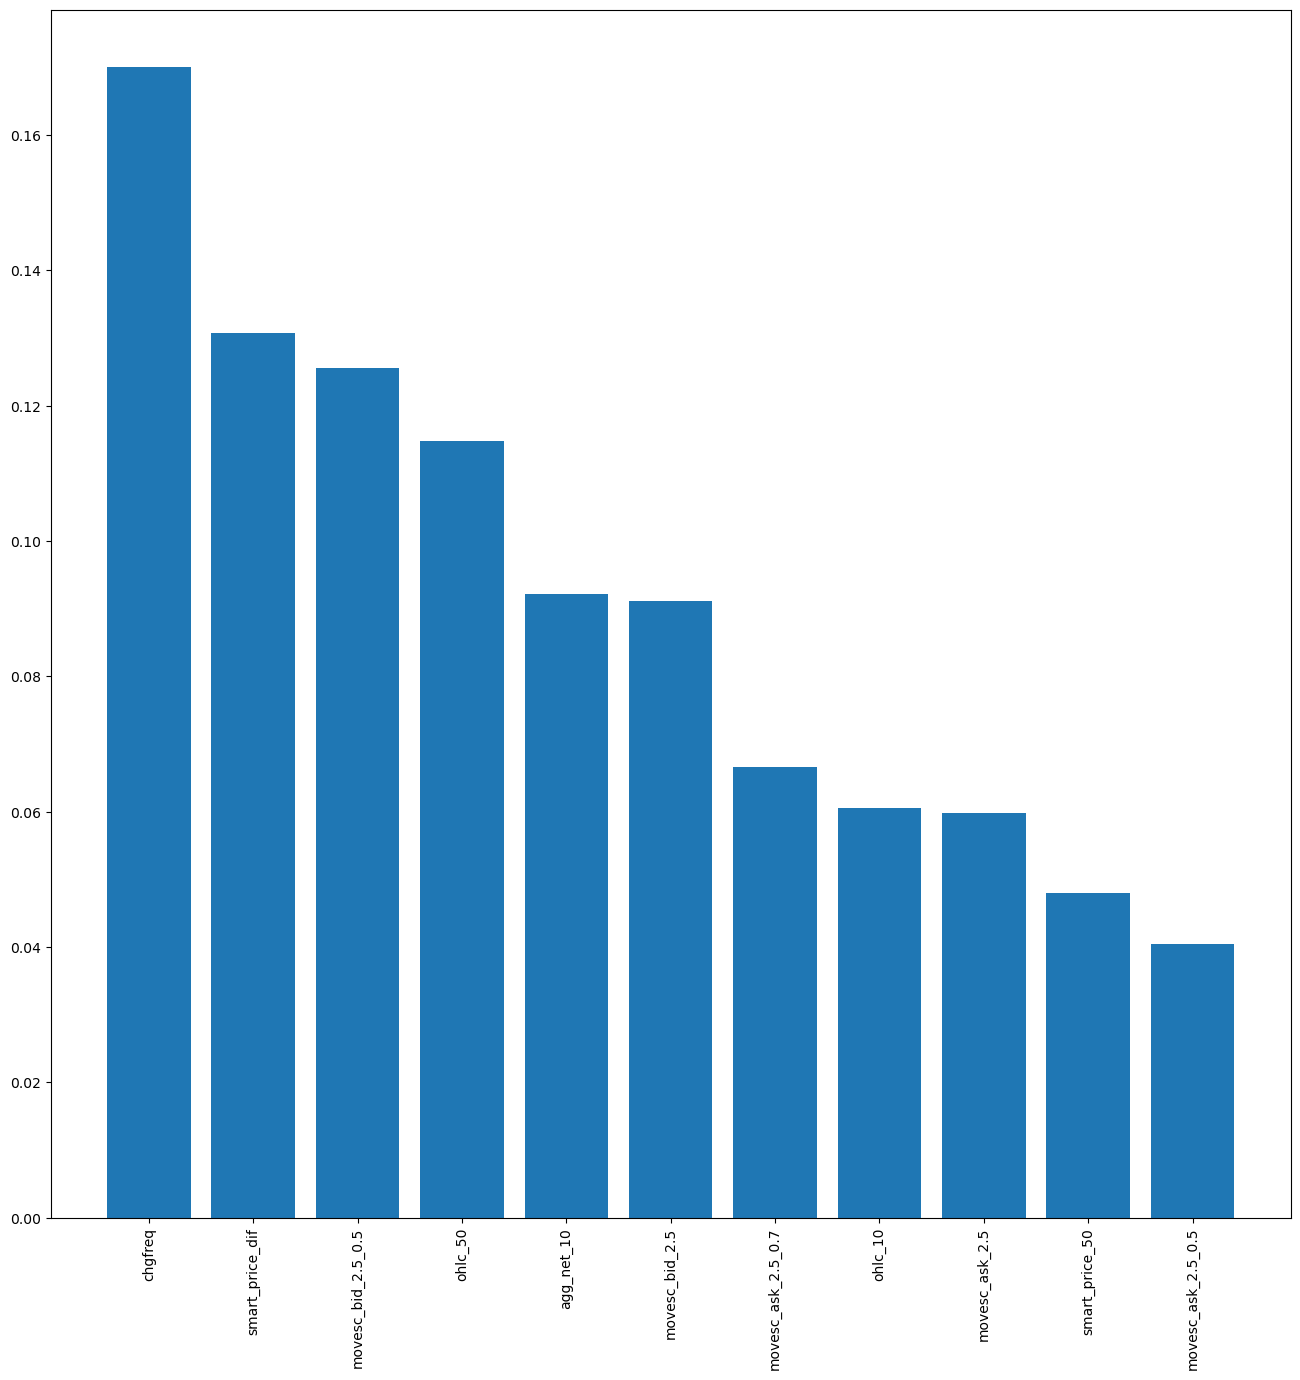

In [62]:
f_imp = ft_importance_plot(fmodel, X_train, plot_result=True)


In [63]:
X_train = train_obj.x_train
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]

X_test = train_obj.x_test
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]
y_train = train_obj.y_train
y_test = train_obj.y_test


In [64]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'map'
                          )

fmodel.fit(X_train, y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(X_train, X_test, y_train, y_test, fitted_model=fmodel)

train_auc: 0.67, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.50 (overfit: 0.04)
train_f1BL:0.56, test_f1BL:0.56 (overfit: 0.00)
--------
cm_train: 
[[3718 4468]
 [ 984 3218]]
cm_test: 
[[1017 1050]
 [ 339  692]]
threshold: 0.4


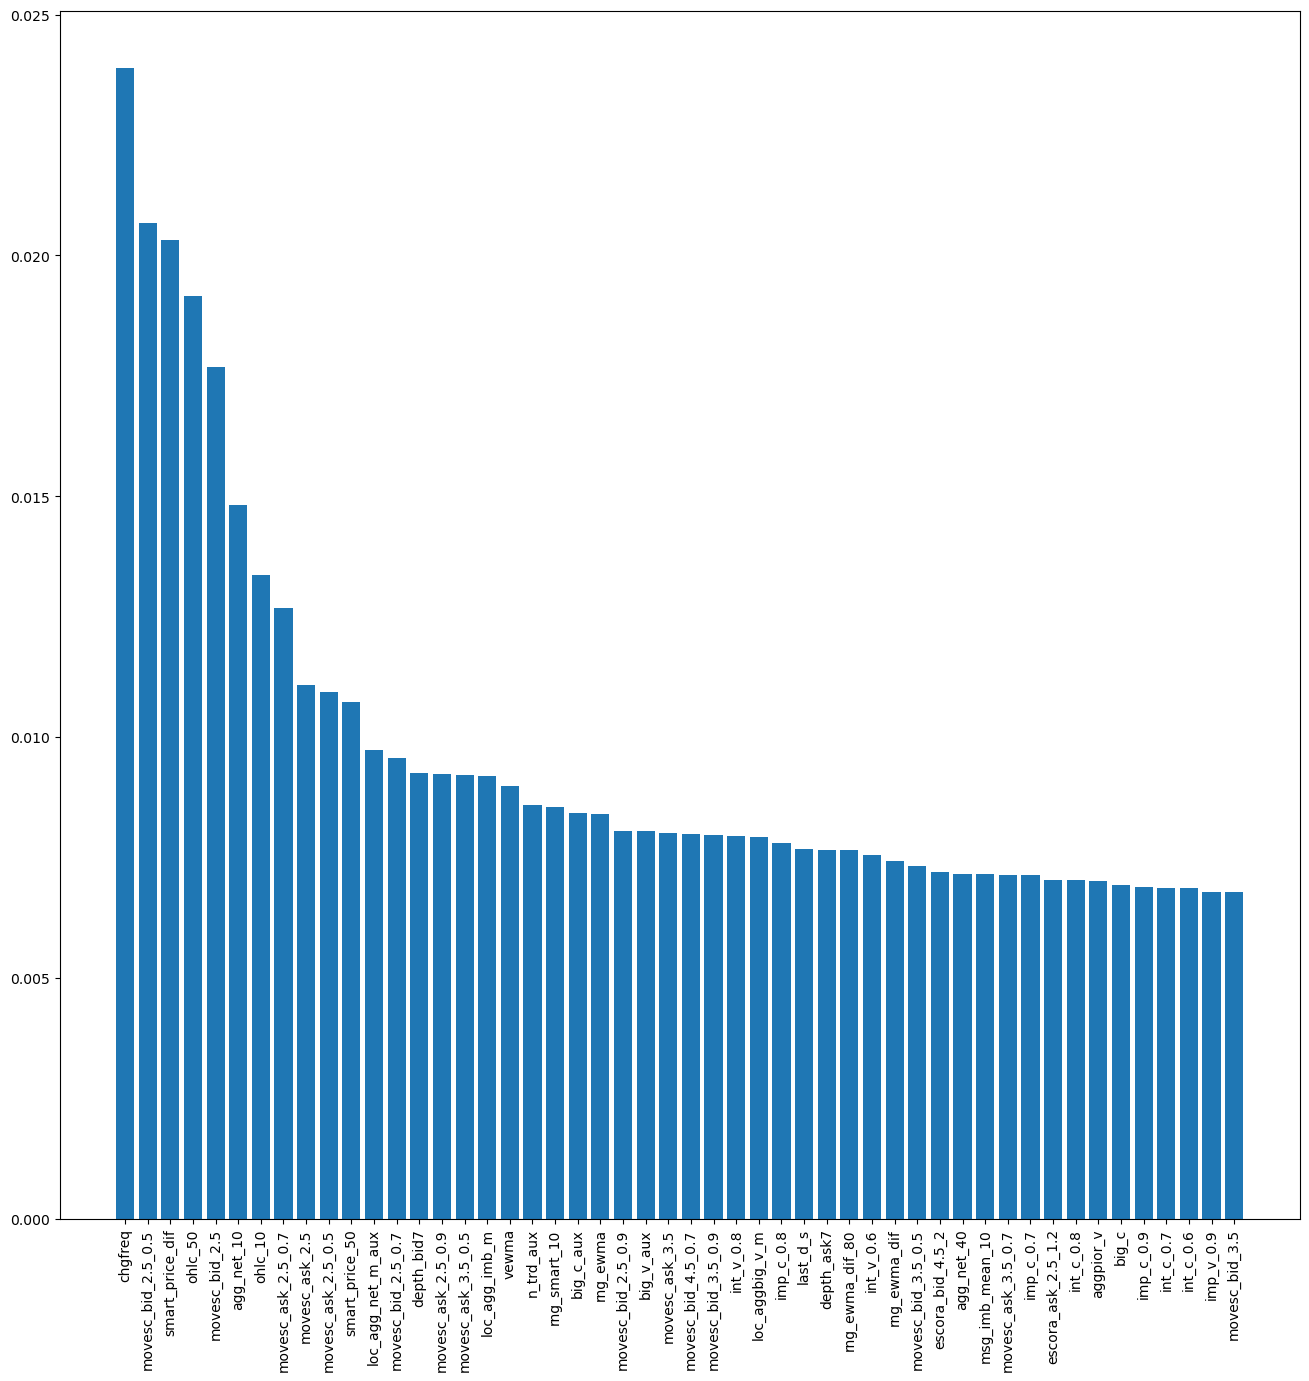

In [65]:
f_imp = ft_importance_plot(fmodel, X_train, plot_result=True)


In [66]:
f_imp['cols'].to_list()

['chgfreq',
 'movesc_bid_2.5_0.5',
 'smart_price_dif',
 'ohlc_50',
 'movesc_bid_2.5',
 'agg_net_10',
 'ohlc_10',
 'movesc_ask_2.5_0.7',
 'movesc_ask_2.5',
 'movesc_ask_2.5_0.5',
 'smart_price_50',
 'loc_agg_net_m_aux',
 'movesc_bid_2.5_0.7',
 'depth_bid7',
 'movesc_ask_2.5_0.9',
 'movesc_ask_3.5_0.5',
 'loc_agg_imb_m',
 'vewma',
 'n_trd_aux',
 'rng_smart_10',
 'big_c_aux',
 'rng_ewma',
 'movesc_bid_2.5_0.9',
 'big_v_aux',
 'movesc_ask_3.5',
 'movesc_bid_4.5_0.7',
 'movesc_bid_3.5_0.9',
 'int_v_0.8',
 'loc_aggbig_v_m',
 'imp_c_0.8',
 'last_d_s',
 'depth_ask7',
 'rng_ewma_dif_80',
 'int_v_0.6',
 'rng_ewma_dif',
 'movesc_bid_3.5_0.5',
 'escora_bid_4.5_2',
 'agg_net_40',
 'msg_imb_mean_10',
 'movesc_ask_3.5_0.7',
 'imp_c_0.7',
 'escora_ask_2.5_1.2',
 'int_c_0.8',
 'aggpior_v',
 'big_c',
 'imp_c_0.9',
 'int_c_0.7',
 'int_c_0.6',
 'imp_v_0.9',
 'movesc_bid_3.5',
 'escora_bid_2.5_0.8',
 'pagg_v_best_0.7',
 'pagg_v_best_0.5',
 'movesc_ask_3.5_0.9',
 'movesc_ask_4.5_0.9',
 'vol_trd_aux',
 'msg_

In [67]:
l_cols = [
 'chgfreq',
 'movesc_bid_2.5_0.5',
 'smart_price_dif',
 'ohlc_50',
 'agg_net_10',
 'ohlc_10',
 'movesc_ask_2.5_0.7',
 'smart_price_50',
 'loc_agg_net_m_aux',
 'depth_bid7',
 'movesc_ask_3.5_0.5',
 'loc_agg_imb_m',
 'vewma',
 'n_trd_aux',
 'rng_smart_10',
 'big_c_aux',
 'rng_ewma',
 'big_v_aux',
 'movesc_bid_4.5_0.7',
 'int_v_0.8',
 'loc_aggbig_v_m',
 'imp_c_0.8',
 'last_d_s',
 'depth_ask7',
 'rng_ewma_dif_80',
 'escora_bid_4.5_2',
 'msg_imb_mean_10',
 'movesc_ask_3.5_0.7',
 'imp_v_0.7',
 'escora_ask_2.5_1.2',
 'int_c_0.8',
 'aggpior_v',
 'aggpior_c'
 ]


X_train = train_obj.x_train[l_cols]
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]

X_test = train_obj.x_test[l_cols]
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]
y_train = train_obj.y_train
y_test = train_obj.y_test


In [68]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'map'
                          )

fmodel.fit(X_train, y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(X_train, X_test, y_train, y_test, fitted_model=fmodel)

train_auc: 0.66, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.50 (overfit: 0.04)
train_f1BL:0.56, test_f1BL:0.56 (overfit: 0.00)
--------
cm_train: 
[[3709 4477]
 [ 997 3205]]
cm_test: 
[[1006 1061]
 [ 329  702]]
threshold: 0.4


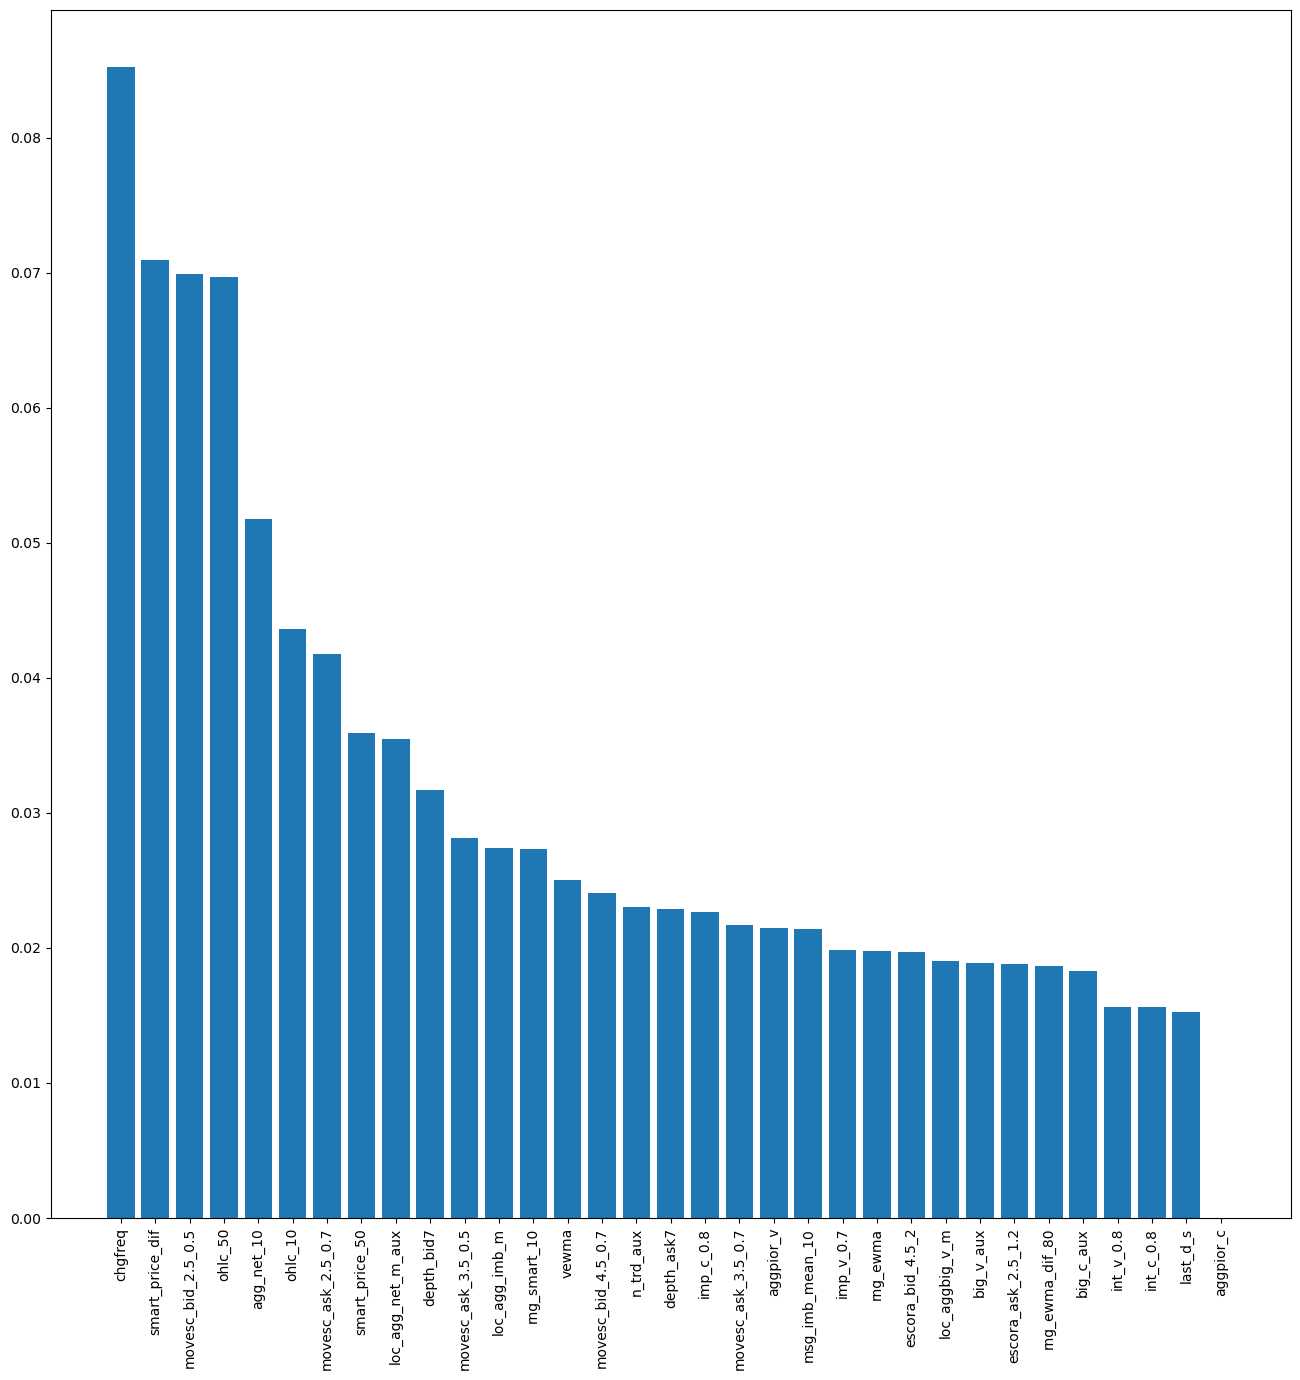

In [69]:
f_imp = ft_importance_plot(fmodel, X_train, plot_result=True)


In [70]:
l_cols = [
 'chgfreq',
 'movesc_bid_2.5_0.5',
 'smart_price_dif',
 'ohlc_50',
 'agg_net_10',
#  'ohlc_10',
#  'movesc_ask_2.5_0.7',
#  'smart_price_50',
#  'loc_agg_net_m_aux',
#  'depth_bid7',
#  'movesc_ask_3.5_0.5',
#  'loc_agg_imb_m',
#  'vewma',
#  'n_trd_aux',
#  'rng_smart_10',
#  'big_c_aux',
#  'rng_ewma',
#  'big_v_aux',
#  'movesc_bid_4.5_0.7',
#  'int_v_0.8',
#  'loc_aggbig_v_m',
#  'imp_c_0.8',
#  'last_d_s',
#  'depth_ask7',
#  'rng_ewma_dif_80',
#  'escora_bid_4.5_2',
#  'msg_imb_mean_10',
#  'movesc_ask_3.5_0.7',
#  'imp_v_0.7',
#  'escora_ask_2.5_1.2',
#  'int_c_0.8',
#  'aggpior_v',
 ]


X_train = train_obj.x_train[l_cols]
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]

X_test = train_obj.x_test[l_cols]
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]
y_train = train_obj.y_train
y_test = train_obj.y_test


In [71]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'map'
                          )

fmodel.fit(X_train, y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(X_train, X_test, y_train, y_test, fitted_model=fmodel)

train_auc: 0.66, test_auc: 0.62 (overfit: 0.04)
train_f1:  0.54, test_f1:  0.50 (overfit: 0.04)
train_f1BL:0.56, test_f1BL:0.57 (overfit: -0.00)
--------
cm_train: 
[[3747 4439]
 [1026 3176]]
cm_test: 
[[1030 1037]
 [ 343  688]]
threshold: 0.4


In [72]:
l_cols = [
 'chgfreq',
 'movesc_bid_2.5_0.5',
 'smart_price_dif',
#  'ohlc_50',
#  'agg_net_10',
#  'ohlc_10',
#  'movesc_ask_2.5_0.7',
#  'smart_price_50',
#  'loc_agg_net_m_aux',
#  'depth_bid7',
#  'movesc_ask_3.5_0.5',
#  'loc_agg_imb_m',
#  'vewma',
#  'n_trd_aux',
#  'rng_smart_10',
#  'big_c_aux',
#  'rng_ewma',
#  'big_v_aux',
#  'movesc_bid_4.5_0.7',
#  'int_v_0.8',
#  'loc_aggbig_v_m',
#  'imp_c_0.8',
#  'last_d_s',
#  'depth_ask7',
#  'rng_ewma_dif_80',
#  'escora_bid_4.5_2',
#  'msg_imb_mean_10',
#  'movesc_ask_3.5_0.7',
#  'imp_v_0.7',
#  'escora_ask_2.5_1.2',
#  'int_c_0.8',
#  'aggpior_v',
 ]


X_train = train_obj.x_train[l_cols]
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]

X_test = train_obj.x_test[l_cols]
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]
y_train = train_obj.y_train
y_test = train_obj.y_test


In [73]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'map'
                          )

fmodel.fit(X_train, y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(X_train, X_test, y_train, y_test, fitted_model=fmodel)

train_auc: 0.66, test_auc: 0.61 (overfit: 0.04)
train_f1:  0.53, test_f1:  0.50 (overfit: 0.03)
train_f1BL:0.56, test_f1BL:0.56 (overfit: -0.01)
--------
cm_train: 
[[3660 4526]
 [1042 3160]]
cm_test: 
[[1019 1048]
 [ 340  691]]
threshold: 0.4


In [74]:
l_cols = [
#  'chgfreq',
 'movesc_bid_2.5_0.5',
 'smart_price_dif',
 'ohlc_50',
 'agg_net_10',
 'ohlc_10',
 'movesc_ask_2.5_0.7',
 'smart_price_50',
 'loc_agg_net_m_aux',
 'depth_bid7',
 'movesc_ask_3.5_0.5',
 'loc_agg_imb_m',
 'vewma',
 'n_trd_aux',
 'rng_smart_10',
 'big_c_aux',
 'rng_ewma',
 'big_v_aux',
 'movesc_bid_4.5_0.7',
 'int_v_0.8',
 'loc_aggbig_v_m',
 'imp_c_0.8',
 'last_d_s',
 'depth_ask7',
 'rng_ewma_dif_80',
 'escora_bid_4.5_2',
 'msg_imb_mean_10',
 'movesc_ask_3.5_0.7',
 'imp_v_0.7',
 'escora_ask_2.5_1.2',
 'int_c_0.8',
 'aggpior_v',
 ]


X_train = train_obj.x_train[l_cols]
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]

X_test = train_obj.x_test[l_cols]
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]
y_train = train_obj.y_train
y_test = train_obj.y_test


In [75]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'map'
                          )

fmodel.fit(X_train, y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(X_train, X_test, y_train, y_test, fitted_model=fmodel)

train_auc: 0.64, test_auc: 0.58 (overfit: 0.07)
train_f1:  0.53, test_f1:  0.48 (overfit: 0.06)
train_f1BL:0.52, test_f1BL:0.51 (overfit: 0.01)
--------
cm_train: 
[[3080 5106]
 [ 821 3381]]
cm_test: 
[[ 845 1222]
 [ 325  706]]
threshold: 0.4


In [76]:
l_cols = [
 'chgfreq',
#  'movesc_bid_2.5_0.5',
#  'smart_price_dif',
#  'ohlc_50',
#  'agg_net_10',
#  'ohlc_10',
#  'movesc_ask_2.5_0.7',
#  'smart_price_50',
#  'loc_agg_net_m_aux',
#  'depth_bid7',
#  'movesc_ask_3.5_0.5',
#  'loc_agg_imb_m',
#  'vewma',
#  'n_trd_aux',
#  'rng_smart_10',
#  'big_c_aux',
#  'rng_ewma',
#  'big_v_aux',
#  'movesc_bid_4.5_0.7',
#  'int_v_0.8',
#  'loc_aggbig_v_m',
#  'imp_c_0.8',
#  'last_d_s',
#  'depth_ask7',
#  'rng_ewma_dif_80',
#  'escora_bid_4.5_2',
#  'msg_imb_mean_10',
#  'movesc_ask_3.5_0.7',
#  'imp_v_0.7',
#  'escora_ask_2.5_1.2',
#  'int_c_0.8',
#  'aggpior_v',
 ]


X_train = train_obj.x_train[l_cols]
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]

X_test = train_obj.x_test[l_cols]
# [['chgfreq','movesc_bid_2.5_0.5','smart_price_dif','ohlc_50','movesc_bid_2.5','agg_net_10','ohlc_10','movesc_ask_2.5_0.7','smart_price_50']]
y_train = train_obj.y_train
y_test = train_obj.y_test


In [77]:
fmodel = xgb.XGBClassifier(n_estimators=1500, 
                          objective='binary:logistic',
                          use_label_encoder=False, 
                          colsample_bytree=0.8, 
                          subsample=.3, 
                          learning_rate=0.0005,
                          max_depth=3, 
                          gamma=0.5,
                          # reg_alpha=0.45,
                          n_jobs=-1,
                          tree_method='hist',  # sempre hist
                          min_child_weight=100, 
                          # scale_pos_weight=1.4,  # mi-up label False_0.5_True
                          verbosity=1,
                          # early_stopping_rounds=10,
                          eval_metric = 'map'
                          )

fmodel.fit(X_train, y_train)

(train_auc, test_auc, train_f1, test_f1, train_f1_balanced, test_f1_balanced, 
cm_train, cm_test, yhat_train, yhat_test, th) = report_results(X_train, X_test, y_train, y_test, fitted_model=fmodel)

train_auc: 0.62, test_auc: 0.61 (overfit: 0.00)
train_f1:  0.50, test_f1:  0.50 (overfit: 0.00)
train_f1BL:0.56, test_f1BL:0.58 (overfit: -0.02)
--------
cm_train: 
[[4039 4147]
 [1395 2807]]
cm_test: 
[[1110  957]
 [ 371  660]]
threshold: 0.4


## Conclusion: labeling with params b_dist = False implies leakage from price change features such as chg_freq, smart_price_dif, vewma etc